<h1>YumPy</h1>

<b>Group Members:</b>
<ul>
<li>Randi Howell</li>
<li>Kyrus Wankadiya</li>
<li>Catherine Safrit</li>
<li>Monica Sehgal</li>
</ul>


<h3>Data Used</h3>
<ul>
<li>Income: https://www.kaggle.com/muonneutrino/us-census-demographic-data/data   </li>
<li>Education: https://www.ers.usda.gov/data-products/county-level-data-sets/</li>
<li>Yelp Fusion API: https://www.yelp.com/fusion</li>
</ul>


<h1>From the top!</h1>

We decided to use the Yelp api, demographic census information, and education data to explore potential correlations. Below is an outline of our projec:

<ul>
<li>Import dependencies</li>
<li>Read in CSV data files</li>
<li>Define US regions based on states</li>
<li>Create main DataFrame (res_df)</li>
<li>Coded a for loop to make our API calls and append to res_df</li>
<li>Exported res_df to a CSV file</li>
<li>Cleaned up res_df (ex: combine American (new) and American (Traditional) </li>
<li>Merged our res_df and our counties CSV file</li>
<li>Examine category distribution across the US</li>
<li>KYRUS? </li>
<li>KYRUS?</li>
<li>Display pie charts for each county thay show restaurant category distribution</li>
<li>Examined price breakdown based on region and restaurant category</li>
<li>Produced graphs to illustrate our findings</li>
<li>MONICA - Compared Pricing and Income?</li>
<li>MONICA - </li>
<li>Catherine - EDUCATION</li>
<li>Conclusions</li>
<li>Limitations </li>
<li>If we only had more time...</li>
</ul>

<h3>Part 1: Initial Setup</h3>

Below, we imported all of our dependencies including the yelpapi needed for the project. Next, we brought in all of our outside data files, These files include county data, census data, and education data. These were all source from government websites and were CSV files. 

Once the CSV files were read in, we modified them as needed to fit in out dataframe. To check the formatting, we used a print statement. 

In [366]:
import yelpapi
import json
import requests
from  pprint import  pprint
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

#reading in county data
counties=pd.read_csv("acs2015_county_data.csv")
counties["county_string"] = counties["County"] + " County, " + counties["State"]
listofcounties = counties["county_string"].tolist()
#reading in zipcodes
zipcodes=pd.read_csv("zip_codes_states.csv")
zipcodes["county_string"] = zipcodes["county"] + " County, " + zipcodes["state"]
listofzipcodes=zipcodes["county_string"].unique().tolist()
counties.to_csv("counties.csv")
zipcodes.to_csv("zcs.csv")
fullcountylist = list(set(listofcounties) & set(listofzipcodes))
counties.head(1)

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,county_string
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6,"Autauga County, Alabama"


<h3>Part 1: County Setup</h3>

In the framework portion, we established regions of the US that we will use later, created a new dataframe that holds out counties, and created a list to hold all the randomly generated countries. This will be more important later. 

In [367]:
#creating regions
WC = ["Washington","Oregon","California","Nevada","Idaho"]
MW = ["Montana","Wyoming","North Dakota","South Dakota","Nebraska","Kansas","Minnesota","Iowa","Missouri",
      "Wisconsin","Illinois","Michigan","Indiana","Ohio","Kentucky"]
SW = ["Arizona","Utah","Colorado","New Mexico","Oklahoma","Texas"]
SE = ["Arkansas","Louisiana","Mississippi","Alabama","Tennessee","Virginia","West Virginia","North Carolina","South Carolina","Georgia","Florida"]
NE = ["District of Columbia","Pennsylvania","Maryland","Delaware","New Jersey","New York","Maine","New Hampshire","Vermont","Massachusetts","Rhode Island","Connecticut"]
counties["Region"]= np.where(counties["State"].isin(WC),'WC',
                    np.where(counties["State"].isin(MW),'MW',
                    np.where(counties["State"].isin(SW),'SW',
                    np.where(counties["State"].isin(SE),'SE',
                    np.where(counties["State"].isin(NE),'NE', 
                             'other')))))

In [368]:
#counties.groupby(["Region"]).sum()["TotalPop"]
cdf = pd.DataFrame(counties,columns=["county_string","Region"])
WClist = (cdf.groupby("Region").get_group("WC")["county_string"]).tolist()
MWlist = (cdf.groupby("Region").get_group("MW")["county_string"]).tolist()
SWlist = (cdf.groupby("Region").get_group("SW")["county_string"]).tolist()
SElist = (cdf.groupby("Region").get_group("SE")["county_string"]).tolist()
NElist = (cdf.groupby("Region").get_group("NE")["county_string"]).tolist()

sample_list = ["Mecklenburg County, North Carolina"]
sample_list.extend(random.sample(list(set(WClist) & set(fullcountylist)),10))
sample_list.extend(random.sample(list(set(MWlist) & set(fullcountylist)),10))
sample_list.extend(random.sample(list(set(SWlist) & set(fullcountylist)),10))
sample_list.extend(random.sample(list(set(SElist) & set(fullcountylist)),9))
sample_list.extend(random.sample(list(set(NElist) & set(fullcountylist)),10))
sample_list

['Mecklenburg County, North Carolina',
 'Shoshone County, Idaho',
 'Pend Oreille County, Washington',
 'Linn County, Oregon',
 'Morrow County, Oregon',
 'Kitsap County, Washington',
 'Jefferson County, Washington',
 'Wasco County, Oregon',
 'Clackamas County, Oregon',
 'Santa Cruz County, California',
 'San Benito County, California',
 'Rice County, Minnesota',
 'Boone County, Missouri',
 'Hamilton County, Kansas',
 'Moody County, South Dakota',
 'Barry County, Missouri',
 'Summit County, Ohio',
 'Gallia County, Ohio',
 'Montgomery County, Kansas',
 'Scott County, Indiana',
 'Graves County, Kentucky',
 'Osage County, Oklahoma',
 'Schleicher County, Texas',
 'Runnels County, Texas',
 'Henderson County, Texas',
 'Bee County, Texas',
 'Wood County, Texas',
 'Pueblo County, Colorado',
 'Hamilton County, Texas',
 'Texas County, Oklahoma',
 'Randall County, Texas',
 'Warren County, Tennessee',
 'Glascock County, Georgia',
 'Franklin County, Florida',
 'East Feliciana County, Louisiana',
 'Cr

<h3>Part 1: Establishing the Main DataFrame</h3>

After reading in the county data and creating regions, we established our primary dataframe. We named the dataframe res_df. This dataframe will be used throughout the project. 

In [369]:
res_df = pd.DataFrame(columns=["name","zipcode","county_string","rating","review_count","category","price","region"])
res_df

,name,zipcode,county_string,rating,review_count,category,price,region


<h3>Part 1: The Framework - Kyrus For Loop</h3>

Kyrus was able to build the primary framework for our project. With multiple nested for loops, Kyrus was able to make the Yelp API call, loop through the first 50 pages for each restuarunt type, then red in that data and append it to the res_df dataframe. 

Kyrus also included a try/ecxcept option as a way to check or verify the code was working and pulling in the data correctly. 

In [370]:
term = ["Italian","Mexican","Chinese","American (Traditional)","American (New)","Indian"]
r = 0
for c in sample_list:
    county_string = str(c)
    if 1==1:
        #we are allowed 5000 queries per 24 hours. if we run out, we can create another. till then, use this
        yelpkey="IXRN_1GI8f8J9Kj5O5GciqeyFSWR5RMh41_rADGy1KrtQ5ZABGGZEkWwot5mOka0NlzlNxXPmzYXLWk88oOV0N_YxD1MSW4kQRfJnFrwfHLtKrr2HcsjLo6uWBzAWnYx"
        if 1==1:
            
            for offset in range(0,49):
                
                response = requests.get(url="https://api.yelp.com/v3/businesses/search", 
                       params= {"location": county_string, "limit":"20", "offset": offset*20},#"term": term}, 
                       headers={'Authorization': 'bearer %s' % yelpkey})
                responsejson = response.json()
                print(offset*20)
                if 1==1:
                    count=0
                    for x in range(0,len(responsejson["businesses"])):
                        
                        try:
                            if((responsejson["businesses"][x]["review_count"] > 0)):
                                zc = int(responsejson["businesses"][x]["location"]["zip_code"])
                                
                                try:
                                    
                                    if (zipcodes.loc[zipcodes["zip_code"]==zc]["county_string"].tolist()[0]== county_string):
                                        for y in range(0,len(responsejson["businesses"][x]["categories"])):
                                            if 1==1:
                                                print("\n",responsejson["businesses"][x]["name"],
                                                        responsejson["businesses"][x]["location"]["zip_code"],
                                                        zipcodes.loc[zipcodes["zip_code"]==zc]["county_string"].tolist()[0],
                                                        responsejson["businesses"][x]["rating"],
                                                        responsejson["businesses"][x]["review_count"],
                                                        responsejson["businesses"][x]["categories"][y]["title"])
                                                if str(responsejson["businesses"][x]["categories"][y]["title"]) in (term):
                                                    res_df.loc[r]=[responsejson["businesses"][x]["name"],
                                                        str(zc),
                                                        county_string,
                                                        responsejson["businesses"][x]["rating"],
                                                        responsejson["businesses"][x]["review_count"],
                                                        responsejson["businesses"][x]["categories"][y]["title"],
                                                        responsejson["businesses"][x]["price"],
                                                        "region"
                                                    ]
                                        
                                                    r += 1
                                                count += 1
                                            
                                            #except:
                                            #    print("")
                                            #    break
                                except:
                                    print("ERROR1")
                                #    break
                                    
                        except:
                            print("ERROR2")
                        #    break
                #except:
                #    print("ERROR3")
                #    break
    
                #print("End of list. Found", count, term, "restaurants in", county_string)
        #except:
        #    print("ERROR4: this one should never happen")
        #    break


0

 Amélie's French Bakery & Café 28205 Mecklenburg County, North Carolina 4.0 1376 Breakfast & Brunch

 Amélie's French Bakery & Café 28205 Mecklenburg County, North Carolina 4.0 1376 Cafes

 Amélie's French Bakery & Café 28205 Mecklenburg County, North Carolina 4.0 1376 Patisserie/Cake Shop

 Le's Sandwiches & Cafe 28213 Mecklenburg County, North Carolina 4.5 313 Vietnamese

 Le's Sandwiches & Cafe 28213 Mecklenburg County, North Carolina 4.5 313 Sandwiches

 Cabo Fish Taco 28205 Mecklenburg County, North Carolina 4.0 990 Latin American

 Cabo Fish Taco 28205 Mecklenburg County, North Carolina 4.0 990 Mexican

 Smelly Cat Coffee 28205 Mecklenburg County, North Carolina 4.5 366 Coffee & Tea

 Smelly Cat Coffee 28205 Mecklenburg County, North Carolina 4.5 366 Breakfast & Brunch

 Midwood Smokehouse 28205 Mecklenburg County, North Carolina 4.5 1281 Barbeque

 Midwood Smokehouse 28205 Mecklenburg County, North Carolina 4.5 1281 Smokehouse

 Midwood Smokehouse 28205 Mecklenburg County, No


 Krazy Fish 28205 Mecklenburg County, North Carolina 4.0 394 Asian Fusion

 Krazy Fish 28205 Mecklenburg County, North Carolina 4.0 394 Breakfast & Brunch

 Sea Level NC 28202 Mecklenburg County, North Carolina 4.0 292 Seafood

 Sea Level NC 28202 Mecklenburg County, North Carolina 4.0 292 Cocktail Bars

 Sea Level NC 28202 Mecklenburg County, North Carolina 4.0 292 Breakfast & Brunch

 5Church 28202 Mecklenburg County, North Carolina 3.5 575 American (New)

 5Church 28202 Mecklenburg County, North Carolina 3.5 575 Bars

 Noda Company Store 28205 Mecklenburg County, North Carolina 4.5 45 Beer Bar

 Noda Company Store 28205 Mecklenburg County, North Carolina 4.5 45 Art Galleries

 Noda Company Store 28205 Mecklenburg County, North Carolina 4.5 45 Wine Bars

 Living Kitchen 28203 Mecklenburg County, North Carolina 4.5 356 Vegetarian

 Living Kitchen 28203 Mecklenburg County, North Carolina 4.5 356 Vegan

 Dressler's - Charlotte 28204 Mecklenburg County, North Carolina 4.5 288 Seafood

 

100

 Tamales La Pasadita 28205 Mecklenburg County, North Carolina 5.0 41 Tacos

 Tamales La Pasadita 28205 Mecklenburg County, North Carolina 5.0 41 Latin American

 Yama Izakaya 28205 Mecklenburg County, North Carolina 4.0 210 Ramen

 Yama Izakaya 28205 Mecklenburg County, North Carolina 4.0 210 Sushi Bars

 Yama Izakaya 28205 Mecklenburg County, North Carolina 4.0 210 Izakaya

 Hattie's Tap & Tavern 28205 Mecklenburg County, North Carolina 5.0 40 Dive Bars

 Hattie's Tap & Tavern 28205 Mecklenburg County, North Carolina 5.0 40 Pubs

 Aria 28202 Mecklenburg County, North Carolina 3.5 322 Italian

 Aria 28202 Mecklenburg County, North Carolina 3.5 322 American (New)

 Queen City Q 28202 Mecklenburg County, North Carolina 3.5 313 Barbeque

 Queen City Q 28202 Mecklenburg County, North Carolina 3.5 313 Southern

 Queen City Q 28202 Mecklenburg County, North Carolina 3.5 313 Bars

 Jasmine Grill 28217 Mecklenburg County, North Carolina 4.5 411 Mediterranean

 Jasmine Grill 28217 Mecklenb

160

 Napa on Providence 28207 Mecklenburg County, North Carolina 4.0 199 American (New)

 Napa on Providence 28207 Mecklenburg County, North Carolina 4.0 199 Bars

 Napa on Providence 28207 Mecklenburg County, North Carolina 4.0 199 Breakfast & Brunch

 Zen Asian Fusion 28203 Mecklenburg County, North Carolina 4.0 182 Asian Fusion

 Zen Asian Fusion 28203 Mecklenburg County, North Carolina 4.0 182 Tapas Bars

 Zen Asian Fusion 28203 Mecklenburg County, North Carolina 4.0 182 Noodles

 Whiskey Warehouse 28203 Mecklenburg County, North Carolina 3.5 266 Pubs

 Whiskey Warehouse 28203 Mecklenburg County, North Carolina 3.5 266 American (New)

 Whiskey Warehouse 28203 Mecklenburg County, North Carolina 3.5 266 Whiskey Bars

 Crispy Banh Mi 28217 Mecklenburg County, North Carolina 4.5 205 Vietnamese

 Crispy Banh Mi 28217 Mecklenburg County, North Carolina 4.5 205 Sandwiches

 Crispy Banh Mi 28217 Mecklenburg County, North Carolina 4.5 205 Juice Bars & Smoothies

 Deejai Thai 28207 Mecklenb


 Morton's The Steakhouse 28202 Mecklenburg County, North Carolina 4.0 116 Bars
220

 Pita Pit 28202 Mecklenburg County, North Carolina 4.0 79 Sandwiches

 Pita Pit 28202 Mecklenburg County, North Carolina 4.0 79 Mediterranean

 Pita Pit 28202 Mecklenburg County, North Carolina 4.0 79 Fast Food

 Mac's Speed Shop 28203 Mecklenburg County, North Carolina 4.0 192 Barbeque

 Mac's Speed Shop 28203 Mecklenburg County, North Carolina 4.0 192 Sports Bars

 Mac's Speed Shop 28203 Mecklenburg County, North Carolina 4.0 192 American (Traditional)

 Zack's Hamburgers 28209 Mecklenburg County, North Carolina 4.0 149 Burgers

 Bar Cocoa 28202 Mecklenburg County, North Carolina 4.0 79 Chocolatiers & Shops

 Bar Cocoa 28202 Mecklenburg County, North Carolina 4.0 79 Breakfast & Brunch

 Bricktop's Restaurant 28211 Mecklenburg County, North Carolina 4.0 277 Breakfast & Brunch

 Bricktop's Restaurant 28211 Mecklenburg County, North Carolina 4.0 277 Desserts

 Bricktop's Restaurant 28211 Mecklenburg Cou

280

 Persuasian Restaurant 28203 Mecklenburg County, North Carolina 4.0 96 Chinese

 Persuasian Restaurant 28203 Mecklenburg County, North Carolina 4.0 96 Wine Bars

 Persuasian Restaurant 28203 Mecklenburg County, North Carolina 4.0 96 Asian Fusion

 Red Sea Restaurant & Bar 28205 Mecklenburg County, North Carolina 4.5 75 Ethiopian

 Red Sea Restaurant & Bar 28205 Mecklenburg County, North Carolina 4.5 75 Bars

 Red Sea Restaurant & Bar 28205 Mecklenburg County, North Carolina 4.5 75 Seafood

 Courtyard Hooligans 28202 Mecklenburg County, North Carolina 4.5 37 Sports Bars

 Courtyard Hooligans 28202 Mecklenburg County, North Carolina 4.5 37 Pubs

 Seoul Poke Bowl 28209 Mecklenburg County, North Carolina 4.5 112 Poke

 Seoul Poke Bowl 28209 Mecklenburg County, North Carolina 4.5 112 Hawaiian

 Seoul Poke Bowl 28209 Mecklenburg County, North Carolina 4.5 112 Sushi Bars

 Ty's Wings & Tings 28215 Mecklenburg County, North Carolina 4.5 46 Chicken Wings

 Ty's Wings & Tings 28215 Mecklenb


 Mellow Mushroom 28209 Mecklenburg County, North Carolina 3.5 167 Pizza

 Mellow Mushroom 28209 Mecklenburg County, North Carolina 3.5 167 Sandwiches

 Mellow Mushroom 28209 Mecklenburg County, North Carolina 3.5 167 Bars

 The Suffolk Punch 28203 Mecklenburg County, North Carolina 4.0 125 Coffee & Tea

 The Suffolk Punch 28203 Mecklenburg County, North Carolina 4.0 125 Beer Bar

 The Suffolk Punch 28203 Mecklenburg County, North Carolina 4.0 125 American (New)
340

 Saigon Palace 28217 Mecklenburg County, North Carolina 4.0 200 Vietnamese

 Uncle Maddio's Pizza Joint 28204 Mecklenburg County, North Carolina 4.0 38 Pizza

 Sunset Soul Food 28217 Mecklenburg County, North Carolina 3.5 122 Seafood

 Sunset Soul Food 28217 Mecklenburg County, North Carolina 3.5 122 Soul Food

 Crisp 28203 Mecklenburg County, North Carolina 3.5 101 American (New)

 Crisp 28203 Mecklenburg County, North Carolina 3.5 101 Salad

 Crisp 28203 Mecklenburg County, North Carolina 3.5 101 Pizza

 Portofino's 2820


 Namastay Kitchen and Hangout 28211 Mecklenburg County, North Carolina 4.0 94 American (New)
400

 Central Coffee Co 28203 Mecklenburg County, North Carolina 4.0 53 Coffee & Tea

 The Red House Cafe 28205 Mecklenburg County, North Carolina 4.0 25 American (Traditional)
ERROR1

 Amalfi's Pasta 'n' Pizza 28213 Mecklenburg County, North Carolina 4.0 68 Italian

 Amalfi's Pasta 'n' Pizza 28213 Mecklenburg County, North Carolina 4.0 68 Pizza

 Anntony's Caribbean Cafe 28269 Mecklenburg County, North Carolina 3.5 108 Caribbean

 Anntony's Caribbean Cafe 28269 Mecklenburg County, North Carolina 3.5 108 Seafood

 Anntony's Caribbean Cafe 28269 Mecklenburg County, North Carolina 3.5 108 Chicken Wings

 ROCKSALT - Charlotte 28209 Mecklenburg County, North Carolina 3.5 220 Seafood

 ROCKSALT - Charlotte 28209 Mecklenburg County, North Carolina 3.5 220 Breakfast & Brunch

 ROCKSALT - Charlotte 28209 Mecklenburg County, North Carolina 3.5 220 Cocktail Bars

 Taipei Express 28207 Mecklenburg County


 Chicken Box Cafe 28262 Mecklenburg County, North Carolina 3.5 44 Southern

 Chicken Box Cafe 28262 Mecklenburg County, North Carolina 3.5 44 Chicken Wings

 Barreled At The Lift 28209 Mecklenburg County, North Carolina 4.0 64 Hookah Bars

 Barreled At The Lift 28209 Mecklenburg County, North Carolina 4.0 64 Music Venues

 7th District 28202 Mecklenburg County, North Carolina 3.0 75 Hookah Bars

 7th District 28202 Mecklenburg County, North Carolina 3.0 75 Seafood

 The Hop Shop 28204 Mecklenburg County, North Carolina 4.5 17 Beer Bar

 The Hop Shop 28204 Mecklenburg County, North Carolina 4.5 17 Wine Bars
460

 Nefelie's 28202 Mecklenburg County, North Carolina 3.5 58 Lounges

 Nefelie's 28202 Mecklenburg County, North Carolina 3.5 58 Mediterranean

 Bill Spoon's Barbecue 28217 Mecklenburg County, North Carolina 4.0 157 Barbeque

 Petra's Bar 28205 Mecklenburg County, North Carolina 4.0 33 Sports Bars

 Petra's Bar 28205 Mecklenburg County, North Carolina 4.0 33 Piano Bars

 Comet Gr

520

 Cook Out 28262 Mecklenburg County, North Carolina 4.0 60 Fast Food

 Cook Out 28262 Mecklenburg County, North Carolina 4.0 60 Burgers

 Cook Out 28262 Mecklenburg County, North Carolina 4.0 60 Sandwiches

 My Camille's 28262 Mecklenburg County, North Carolina 4.0 25 Salad

 My Camille's 28262 Mecklenburg County, North Carolina 4.0 25 Pizza

 My Camille's 28262 Mecklenburg County, North Carolina 4.0 25 Juice Bars & Smoothies

 Quidleys Delight 28262 Mecklenburg County, North Carolina 4.5 68 Caribbean

 Quidleys Delight 28262 Mecklenburg County, North Carolina 4.5 68 Seafood

 Quidleys Delight 28262 Mecklenburg County, North Carolina 4.5 68 Vegetarian

 Mama's Caribbean Grill 28205 Mecklenburg County, North Carolina 3.0 65 Caribbean

 Fresh Chef Kitchen 28211 Mecklenburg County, North Carolina 4.5 34 Fast Food

 Fresh Chef Kitchen 28211 Mecklenburg County, North Carolina 4.5 34 American (Traditional)

 Roxbury 28202 Mecklenburg County, North Carolina 3.5 47 Dance Clubs

 Roxbury 28

580

 Cook Out 28208 Mecklenburg County, North Carolina 3.5 45 Burgers

 Cook Out 28208 Mecklenburg County, North Carolina 3.5 45 Fast Food

 Cook Out 28208 Mecklenburg County, North Carolina 3.5 45 Hot Dogs

 Five Guys 28204 Mecklenburg County, North Carolina 3.5 36 Fast Food

 Five Guys 28204 Mecklenburg County, North Carolina 3.5 36 Burgers

 Adams 7th Street Market 28204 Mecklenburg County, North Carolina 4.0 23 Breakfast & Brunch

 Adams 7th Street Market 28204 Mecklenburg County, North Carolina 4.0 23 Sandwiches

 Adams 7th Street Market 28204 Mecklenburg County, North Carolina 4.0 23 Burgers

 Honey Bun's Cafeteria 28227 Mecklenburg County, North Carolina 4.0 45 Dim Sum

 Pei Wei 28262 Mecklenburg County, North Carolina 3.5 58 Chinese

 Pei Wei 28262 Mecklenburg County, North Carolina 3.5 58 Gluten-Free

 Pei Wei 28262 Mecklenburg County, North Carolina 3.5 58 Asian Fusion

 Crackin' Crawfish 28262 Mecklenburg County, North Carolina 3.5 76 Seafood

 Crackin' Crawfish 28262 Meckl

640

 RibbonWalk Nature Preserve 28269 Mecklenburg County, North Carolina 4.0 10 Parks

 Stache House Bar & Lounge 28203 Mecklenburg County, North Carolina 3.0 57 Lounges

 Stache House Bar & Lounge 28203 Mecklenburg County, North Carolina 3.0 57 Hookah Bars

 QDOBA Mexican Eats 28262 Mecklenburg County, North Carolina 4.0 31 Mexican

 QDOBA Mexican Eats 28262 Mecklenburg County, North Carolina 4.0 31 Fast Food

 QDOBA Mexican Eats 28262 Mecklenburg County, North Carolina 4.0 31 Caterers

 Caribou Coffee 28209 Mecklenburg County, North Carolina 4.0 47 Coffee & Tea

 Panera Bread 28262 Mecklenburg County, North Carolina 3.5 57 Sandwiches

 Panera Bread 28262 Mecklenburg County, North Carolina 3.5 57 Salad

 Panera Bread 28262 Mecklenburg County, North Carolina 3.5 57 Soup

 Rooftop 210 28202 Mecklenburg County, North Carolina 3.0 49 Venues & Event Spaces

 Rooftop 210 28202 Mecklenburg County, North Carolina 3.0 49 Bars

 Rooftop 210 28202 Mecklenburg County, North Carolina 3.0 49 Music

700

 Ale's University 28262 Mecklenburg County, North Carolina 3.5 49 Sports Bars

 Ale's University 28262 Mecklenburg County, North Carolina 3.5 49 American (Traditional)

 Cuzzo's Cuisine 28208 Mecklenburg County, North Carolina 4.0 23 Food Trucks

 Cuzzo's Cuisine 28208 Mecklenburg County, North Carolina 4.0 23 Southern

 Romano's Macaroni Grill 28262 Mecklenburg County, North Carolina 2.5 91 Italian

 MezzaNotte Brick Oven Pizza 28211 Mecklenburg County, North Carolina 3.5 59 Pizza

 MezzaNotte Brick Oven Pizza 28211 Mecklenburg County, North Carolina 3.5 59 Italian

 Texas Ranch Steak House 28262 Mecklenburg County, North Carolina 3.0 19 Steakhouses

 Island Grocery 28212 Mecklenburg County, North Carolina 4.0 24 Grocery

 Island Grocery 28212 Mecklenburg County, North Carolina 4.0 24 Caribbean

 Island Grocery 28212 Mecklenburg County, North Carolina 4.0 24 Soul Food

 Zia Pia Imports 28202 Mecklenburg County, North Carolina 4.5 9 Pasta Shops

 Zia Pia Imports 28202 Mecklenburg 

760

 McAlister's Deli 28262 Mecklenburg County, North Carolina 3.5 38 Delis

 McAlister's Deli 28262 Mecklenburg County, North Carolina 3.5 38 Sandwiches

 McAlister's Deli 28262 Mecklenburg County, North Carolina 3.5 38 Salad

 Secret Society Cigar Bar And Lounge 28208 Mecklenburg County, North Carolina 5.0 7 Cigar Bars

 Secret Society Cigar Bar And Lounge 28208 Mecklenburg County, North Carolina 5.0 7 Lounges

 Kandy Bar 28202 Mecklenburg County, North Carolina 2.5 49 Wine Bars

 Kandy Bar 28202 Mecklenburg County, North Carolina 2.5 49 Cocktail Bars

 Kandy Bar 28202 Mecklenburg County, North Carolina 2.5 49 Venues & Event Spaces

 Park Road Soda Shoppe 28209 Mecklenburg County, North Carolina 4.0 26 American (Traditional)

 The Cooking Pot 28212 Mecklenburg County, North Carolina 4.0 22 African

 Panera Bread 28207 Mecklenburg County, North Carolina 2.5 35 Sandwiches

 Panera Bread 28207 Mecklenburg County, North Carolina 2.5 35 Salad

 Panera Bread 28207 Mecklenburg County, Nort

820

 Eastway Park 28213 Mecklenburg County, North Carolina 4.0 5 Parks

 Eastway Park 28213 Mecklenburg County, North Carolina 4.0 5 Disc Golf

 Five Guys 28205 Mecklenburg County, North Carolina 3.0 17 Burgers

 Five Guys 28205 Mecklenburg County, North Carolina 3.0 17 Fast Food

 Niki's Food Shop 28216 Mecklenburg County, North Carolina 3.5 13 American (Traditional)

 Niki's Food Shop 28216 Mecklenburg County, North Carolina 3.5 13 Breakfast & Brunch

 Queen City Brewers Festival 28206 Mecklenburg County, North Carolina 5.0 4 Local Flavor

 Teddy's Pizza 28215 Mecklenburg County, North Carolina 3.0 24 Chicken Wings

 Teddy's Pizza 28215 Mecklenburg County, North Carolina 3.0 24 Pizza

 Hickory Tavern 28262 Mecklenburg County, North Carolina 2.5 84 American (Traditional)

 Hickory Tavern 28262 Mecklenburg County, North Carolina 2.5 84 Sports Bars

 Hickory Tavern 28262 Mecklenburg County, North Carolina 2.5 84 Chicken Wings

 Subway 28204 Mecklenburg County, North Carolina 3.5 18 San


 TCB 54 Bar & Grill 28269 Mecklenburg County, North Carolina 4.0 6 Bars

 TCB 54 Bar & Grill 28269 Mecklenburg County, North Carolina 4.0 6 Dance Clubs
880

 Jersey Mike's Subs 28208 Mecklenburg County, North Carolina 4.0 23 Fast Food

 Jersey Mike's Subs 28208 Mecklenburg County, North Carolina 4.0 23 Delis

 Jersey Mike's Subs 28208 Mecklenburg County, North Carolina 4.0 23 Sandwiches

 Starbucks 28269 Mecklenburg County, North Carolina 3.0 27 Coffee & Tea

 Waffle House 28217 Mecklenburg County, North Carolina 3.0 30 Breakfast & Brunch

 Waffle House 28217 Mecklenburg County, North Carolina 3.0 30 Diners

 Waffle House 28217 Mecklenburg County, North Carolina 3.0 30 American (Traditional)

 El Tropico 28213 Mecklenburg County, North Carolina 3.5 3 Mexican

 El Tropico 28213 Mecklenburg County, North Carolina 3.5 3 Latin American

 IHOP 28262 Mecklenburg County, North Carolina 2.5 44 American (Traditional)

 IHOP 28262 Mecklenburg County, North Carolina 2.5 44 Breakfast & Brunch

 O


 Greystone Pub 28209 Mecklenburg County, North Carolina 3.5 20 Greek

 Queen's Soul Food 28227 Mecklenburg County, North Carolina 3.0 39 Soul Food

 Hwy 55 Burgers Shakes & Fries 28262 Mecklenburg County, North Carolina 2.5 24 Burgers

 Hwy 55 Burgers Shakes & Fries 28262 Mecklenburg County, North Carolina 2.5 24 American (Traditional)

 Hwy 55 Burgers Shakes & Fries 28262 Mecklenburg County, North Carolina 2.5 24 Ice Cream & Frozen Yogurt

 Apostrophe Lounge 28203 Mecklenburg County, North Carolina 3.5 11 Lounges
940

 NC Tavern 28213 Mecklenburg County, North Carolina 2.5 34 Seafood

 NC Tavern 28213 Mecklenburg County, North Carolina 2.5 34 Sports Bars

 NC Tavern 28213 Mecklenburg County, North Carolina 2.5 34 Chicken Wings

 McAlister's Deli 28209 Mecklenburg County, North Carolina 3.0 37 Delis

 McAlister's Deli 28209 Mecklenburg County, North Carolina 3.0 37 Sandwiches

 McAlister's Deli 28209 Mecklenburg County, North Carolina 3.0 37 Salad

 Taco Bell 28262 Mecklenburg County,

20

 Earle's Pub, Grub and Suites 83846 Shoshone County, Idaho 4.0 5 American (Traditional)
ERROR1

 Mountain Cafe and Catering 83837 Shoshone County, Idaho 4.0 10 American (Traditional)

 Mountain Cafe and Catering 83837 Shoshone County, Idaho 4.0 10 Coffee & Tea

 Mountain Cafe and Catering 83837 Shoshone County, Idaho 4.0 10 Breakfast & Brunch

 Brooks Hotel 83873 Shoshone County, Idaho 3.5 12 Hotels

 Brooks Hotel 83873 Shoshone County, Idaho 3.5 12 Lounges

 Sam's Restaurant 83837 Shoshone County, Idaho 3.0 24 American (Traditional)

 6th & Cedar Espresso Bar 83873 Shoshone County, Idaho 4.5 4 Coffee & Tea

 Wildcat Pizza 83837 Shoshone County, Idaho 3.0 18 Pizza

 Noah's Canteen 83837 Shoshone County, Idaho 2.5 54 American (New)

 Brooks Restaurant 83873 Shoshone County, Idaho 3.5 15 American (Traditional)

 Humdinger Drive-In 83837 Shoshone County, Idaho 3.5 13 Diners

 Mom's Vintage Eatery 83849 Shoshone County, Idaho 5.0 7 American (New)

 Mom's Vintage Eatery 83849 Shoshone C

20
ERROR1

 Vault 244 97321 Linn County, Oregon 4.0 166 American (New)

 Vault 244 97321 Linn County, Oregon 4.0 166 Lounges

 Oregon Barbecue 97321 Linn County, Oregon 4.5 104 Barbeque

 Oregon Barbecue 97321 Linn County, Oregon 4.5 104 Steakhouses

 Oregon Barbecue 97321 Linn County, Oregon 4.5 104 Sandwiches
40

 Frankie's 97321 Linn County, Oregon 4.0 191 American (Traditional)

 Frankie's 97321 Linn County, Oregon 4.0 191 Seafood

 Frankie's 97321 Linn County, Oregon 4.0 191 Steakhouses
60

 Spoleto's Pizzeria & Wine Shop 97386 Linn County, Oregon 4.0 31 Pizza

 Spoleto's Pizzeria & Wine Shop 97386 Linn County, Oregon 4.0 31 Salad

 Spoleto's Pizzeria & Wine Shop 97386 Linn County, Oregon 4.0 31 Beer, Wine & Spirits
ERROR1

 Pepper Tree Sausage House 97321 Linn County, Oregon 4.5 64 Meat Shops

 Pepper Tree Sausage House 97321 Linn County, Oregon 4.5 64 American (New)
80

 1847 Bar & Grill 97355 Linn County, Oregon 4.0 60 Wine Bars

 1847 Bar & Grill 97355 Linn County, Oregon 4.0 

660

 Trio Tavern 97360 Linn County, Oregon 4.5 9 Bars

 Trio Tavern 97360 Linn County, Oregon 4.5 9 Pool Halls

 Trio Tavern 97360 Linn County, Oregon 4.5 9 American (Traditional)
680

 Taqueria Alonzo 97321 Linn County, Oregon 4.0 24 Mexican

 Little Wuesten German Food 97321 Linn County, Oregon 4.0 18 German

 Little Wuesten German Food 97321 Linn County, Oregon 4.0 18 Cafes

 Little Wuesten German Food 97321 Linn County, Oregon 4.0 18 Coffee & Tea
700

 Dragon Chinese Kitchen 97358 Linn County, Oregon 4.5 14 Chinese

 Pioneer Villa Truck Plaza 97348 Linn County, Oregon 3.5 33 Hotels

 Pioneer Villa Truck Plaza 97348 Linn County, Oregon 3.5 33 American (Traditional)

 Angelo's Fiesta Grill 97348 Linn County, Oregon 4.5 12 Mexican
720

 Dutch Bros Coffee 97386 Linn County, Oregon 5.0 5 Coffee & Tea
740
760

 Rigoberto's 97321 Linn County, Oregon 3.5 36 Mexican
780
ERROR1
ERROR1

 Big Town Hero 97321 Linn County, Oregon 4.0 16 Delis
ERROR1
800

 Humpty's Dump Bar and Grill 97321 Linn 


 Teriyaki Delite 98383 Kitsap County, Washington 4.0 67 Japanese

 The Habit Burger Grill 98383 Kitsap County, Washington 4.0 85 Salad

 The Habit Burger Grill 98383 Kitsap County, Washington 4.0 85 Burgers

 The Habit Burger Grill 98383 Kitsap County, Washington 4.0 85 Sandwiches

 4 Sisters 98311 Kitsap County, Washington 4.5 136 Vietnamese
40

 Green Light Diner 98370 Kitsap County, Washington 4.0 202 Diners

 Green Light Diner 98370 Kitsap County, Washington 4.0 202 Breakfast & Brunch

 Green Light Diner 98370 Kitsap County, Washington 4.0 202 American (Traditional)

 Blazing Onion Burger Company 98383 Kitsap County, Washington 3.0 175 American (New)

 Blazing Onion Burger Company 98383 Kitsap County, Washington 3.0 175 Burgers

 The Toad House 98311 Kitsap County, Washington 4.0 166 Pizza

 The Toad House 98311 Kitsap County, Washington 4.0 166 Beer Bar

 The Toad House 98311 Kitsap County, Washington 4.0 166 Sandwiches

 ChocMo 98370 Kitsap County, Washington 4.0 92 Chocolatiers

100

 Envy Bar and Grill 98370 Kitsap County, Washington 3.5 41 Sports Bars

 Envy Bar and Grill 98370 Kitsap County, Washington 3.5 41 American (Traditional)

 Elmer's Restaurant 98370 Kitsap County, Washington 3.5 115 Breakfast & Brunch

 Elmer's Restaurant 98370 Kitsap County, Washington 3.5 115 American (Traditional)

 Elmer's Restaurant 98370 Kitsap County, Washington 3.5 115 Diners

 Grounds For Change 98370 Kitsap County, Washington 5.0 13 Coffee & Tea

 Urban City Brew Co 98383 Kitsap County, Washington 4.5 18 Coffee & Tea

 Urban City Brew Co 98383 Kitsap County, Washington 4.5 18 Bakeries

 Urban City Brew Co 98383 Kitsap County, Washington 4.5 18 Breakfast & Brunch

 Silverdale Waterfront Park 98383 Kitsap County, Washington 4.0 14 Parks

 QDOBA Mexican Eats 98383 Kitsap County, Washington 3.5 25 Mexican

 QDOBA Mexican Eats 98383 Kitsap County, Washington 3.5 25 Fast Food

 QDOBA Mexican Eats 98383 Kitsap County, Washington 3.5 25 Caterers

 Chuck E. Cheese's 98383 Kitsap C

180

 Poulsbo Fish Park 98370 Kitsap County, Washington 4.5 4 Hiking

 Poulsbo Fish Park 98370 Kitsap County, Washington 4.5 4 Parks

 Poulsbo Fish Park 98370 Kitsap County, Washington 4.5 4 Mountain Biking

 Wendy's 98383 Kitsap County, Washington 2.0 21 Burgers

 Wendy's 98383 Kitsap County, Washington 2.0 21 Fast Food

 Masi Shop & Shell Gas Station 98392 Kitsap County, Washington 3.5 14 Coffee & Tea

 Masi Shop & Shell Gas Station 98392 Kitsap County, Washington 3.5 14 Beer, Wine & Spirits

 Masi Shop & Shell Gas Station 98392 Kitsap County, Washington 3.5 14 Convenience Stores

 Jack In The Box 98383 Kitsap County, Washington 2.0 20 Burgers

 Jack In The Box 98383 Kitsap County, Washington 2.0 20 Fast Food

 Lions Park 98310 Kitsap County, Washington 4.5 11 Parks

 Shari's Restaurant 98310 Kitsap County, Washington 2.5 47 American (Traditional)

 Shari's Restaurant 98310 Kitsap County, Washington 2.5 47 Desserts

 Shari's Restaurant 98310 Kitsap County, Washington 2.5 47 Cafes

 P

260

 Old Mill Park 98383 Kitsap County, Washington 3.0 1 Parks

 Old Mill Park 98383 Kitsap County, Washington 3.0 1 Hiking

 expresso 98383 Kitsap County, Washington 3.0 1 Coffee & Tea

 Kava Kaffe 98311 Kitsap County, Washington 4.0 2 Coffee & Tea

 M&T Coffee 98311 Kitsap County, Washington 5.0 1 Coffee & Tea

 Illahee Preserve 98310 Kitsap County, Washington 5.0 1 Parks

 Domino's Pizza 98311 Kitsap County, Washington 3.0 6 Chicken Wings

 Domino's Pizza 98311 Kitsap County, Washington 3.0 6 Pizza

 Domino's Pizza 98311 Kitsap County, Washington 3.0 6 Sandwiches

 Fairgrounds Coffee 98311 Kitsap County, Washington 4.0 1 Food Stands

 Up In Smoke 98370 Kitsap County, Washington 3.0 3 Hookah Bars

 Up In Smoke 98370 Kitsap County, Washington 3.0 3 Tobacco Shops

 Masi Latté 98370 Kitsap County, Washington 5.0 1 Coffee & Tea

 Central Cafe 98370 Kitsap County, Washington 4.0 1 Cafes

 Papas Eats Treats and Spirits 98310 Kitsap County, Washington 2.5 11 American (New)

 Papas Eats Tre

400
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
420
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
440
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
460
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
480
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
500
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
520
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
540
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
560
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR2
ERROR

280

 Elka Bee's Coffee Shop & Tea Haus - Clackamas 97015 Clackamas County, Oregon 4.0 203 Coffee & Tea

 Elka Bee's Coffee Shop & Tea Haus - Clackamas 97015 Clackamas County, Oregon 4.0 203 Sandwiches

 Elka Bee's Coffee Shop & Tea Haus - Clackamas 97015 Clackamas County, Oregon 4.0 203 Breakfast & Brunch

 Thai Home Restaurant 97055 Clackamas County, Oregon 4.0 125 Thai

 Mi Famiglia 97045 Clackamas County, Oregon 4.0 269 Italian
300
320
ERROR1
340

 Hush Hush Cafe 97035 Clackamas County, Oregon 4.5 174 Middle Eastern

 Hush Hush Cafe 97035 Clackamas County, Oregon 4.5 174 Mediterranean

 Hush Hush Cafe 97035 Clackamas County, Oregon 4.5 174 Halal
360

 Glacier Haus Bistro 97028 Clackamas County, Oregon 4.5 142 German

 Glacier Haus Bistro 97028 Clackamas County, Oregon 4.5 142 American (Traditional)

 Glacier Haus Bistro 97028 Clackamas County, Oregon 4.5 142 Pizza
ERROR1

 Lee's Teriyaki 97027 Clackamas County, Oregon 5.0 76 Pan Asian
380

 Grammas Corner Restaurant 97222 Clackamas

900

 Hop N Cork 97035 Clackamas County, Oregon 4.5 95 Wine Bars

 Hop N Cork 97035 Clackamas County, Oregon 4.5 95 Beer Bar

 Hop N Cork 97035 Clackamas County, Oregon 4.5 95 American (Traditional)

 Dang's Thai Kitchen 97034 Clackamas County, Oregon 4.0 197 Thai

 Sweet Tomatoes 97015 Clackamas County, Oregon 4.0 147 Vegetarian

 Sweet Tomatoes 97015 Clackamas County, Oregon 4.0 147 Buffets

 Sweet Tomatoes 97015 Clackamas County, Oregon 4.0 147 Salad

 Retrolicious 97035 Clackamas County, Oregon 5.0 51 Comfort Food

 Retrolicious 97035 Clackamas County, Oregon 5.0 51 Food Trucks

 Anything Else? Thai Fusion Food 97222 Clackamas County, Oregon 4.5 59 Thai

 Anything Else? Thai Fusion Food 97222 Clackamas County, Oregon 4.5 59 Food Trucks
920

 Sabrozon Fresh Mexican Food 97034 Clackamas County, Oregon 4.5 114 Mexican

 Nicoletta's Table and Marketplace 97034 Clackamas County, Oregon 4.0 203 Italian

 Nicoletta's Table and Marketplace 97034 Clackamas County, Oregon 4.0 203 Delis

 Nic

60

 The Ugly Mug 95073 Santa Cruz County, California 4.5 147 Coffee & Tea

 The Ugly Mug 95073 Santa Cruz County, California 4.5 147 Ice Cream & Frozen Yogurt

 The Ugly Mug 95073 Santa Cruz County, California 4.5 147 Bakeries

 The Abbey 95060 Santa Cruz County, California 4.0 352 Coffee & Tea

 Manuel's Mexican Restaurant 95003 Santa Cruz County, California 4.0 502 Mexican

 Malabar 95062 Santa Cruz County, California 4.0 668 Vegan

 Malabar 95062 Santa Cruz County, California 4.0 668 Vegetarian

 Malabar 95062 Santa Cruz County, California 4.0 668 Asian Fusion

 Charlie Hong Kong 95062 Santa Cruz County, California 3.5 770 Asian Fusion

 Charlie Hong Kong 95062 Santa Cruz County, California 3.5 770 Vegan

 Charlie Hong Kong 95062 Santa Cruz County, California 3.5 770 Fast Food

 Golden Fu Wah 95073 Santa Cruz County, California 4.0 168 Chinese

 Golden Fu Wah 95073 Santa Cruz County, California 4.0 168 Asian Fusion

 Woodstock's Pizza Santa Cruz 95060 Santa Cruz County, California 

120

 Zameen At The Point 95062 Santa Cruz County, California 4.5 89 Falafel

 Zameen At The Point 95062 Santa Cruz County, California 4.5 89 Food Trucks

 Naka Sushi Restaurant 95010 Santa Cruz County, California 4.0 182 Japanese

 Naka Sushi Restaurant 95010 Santa Cruz County, California 4.0 182 Sushi Bars

 iCrave 95010 Santa Cruz County, California 4.5 96 Creperies

 iCrave 95010 Santa Cruz County, California 4.5 96 Coffee & Tea

 iCrave 95010 Santa Cruz County, California 4.5 96 Bubble Tea

 Chocolate 95060 Santa Cruz County, California 3.5 519 Desserts

 Chocolate 95060 Santa Cruz County, California 3.5 519 Mediterranean

 Scotts Valley Chinese Cuisine 95066 Santa Cruz County, California 4.0 119 Chinese

 Mijo's Taqueria 95010 Santa Cruz County, California 4.5 84 Mexican

 La Posta 95062 Santa Cruz County, California 4.0 274 Italian

 The Hole In The Wall Cafe 95003 Santa Cruz County, California 3.5 284 Breakfast & Brunch

 The Hole In The Wall Cafe 95003 Santa Cruz County, Calif

180

 San Marcos Charquito Tacos y Tortas 95010 Santa Cruz County, California 4.5 67 Tacos

 Chubby's Diner 95066 Santa Cruz County, California 4.0 118 Diners

 Sake Japanese Steak House & Sushi Bar 95060 Santa Cruz County, California 3.5 252 Japanese

 Sake Japanese Steak House & Sushi Bar 95060 Santa Cruz County, California 3.5 252 Sushi Bars

 Sake Japanese Steak House & Sushi Bar 95060 Santa Cruz County, California 3.5 252 Steakhouses

 Suda 95062 Santa Cruz County, California 3.5 296 American (New)

 Suda 95062 Santa Cruz County, California 3.5 296 Bars

 Capitola Wine Bar 95010 Santa Cruz County, California 4.0 98 Wine Bars

 Raymond's Catering 95060 Santa Cruz County, California 4.5 72 Mexican

 Raymond's Catering 95060 Santa Cruz County, California 4.5 72 Food Trucks

 Pleasure Pizza East Side Eatery 95062 Santa Cruz County, California 3.5 331 Pizza

 Pleasure Pizza East Side Eatery 95062 Santa Cruz County, California 3.5 331 Gluten-Free

 Pleasure Pizza East Side Eatery 95062 

240

 Gilda's Family Restaurant 95060 Santa Cruz County, California 3.5 401 Seafood

 Gilda's Family Restaurant 95060 Santa Cruz County, California 3.5 401 American (Traditional)

 Cafe Rio Aptos 95003 Santa Cruz County, California 3.5 245 American (New)

 Cafe Rio Aptos 95003 Santa Cruz County, California 3.5 245 Seafood

 Cafe Rio Aptos 95003 Santa Cruz County, California 3.5 245 Bars

 The Sand Bar 95010 Santa Cruz County, California 3.5 109 Cocktail Bars

 The Sand Bar 95010 Santa Cruz County, California 3.5 109 American (Traditional)

 Ideal Bar & Grill 95060 Santa Cruz County, California 2.5 962 Cocktail Bars

 Ideal Bar & Grill 95060 Santa Cruz County, California 2.5 962 Breakfast & Brunch

 Ideal Bar & Grill 95060 Santa Cruz County, California 2.5 962 American (Traditional)

 Pizza 1 95003 Santa Cruz County, California 3.5 128 Pizza

 Chef Liu 95066 Santa Cruz County, California 3.5 66 Chinese

 Sitar Indian Cuisine 95060 Santa Cruz County, California 3.5 325 Indian

 Woodies C

320

 Motiv 95060 Santa Cruz County, California 3.0 197 Bars

 Motiv 95060 Santa Cruz County, California 3.0 197 Dance Clubs

 Pizzeria Avanti 95060 Santa Cruz County, California 4.0 114 Pizza

 Pizzeria Avanti 95060 Santa Cruz County, California 4.0 114 Salad

 Pizzeria Avanti 95060 Santa Cruz County, California 4.0 114 Chicken Wings

 Starbucks 95073 Santa Cruz County, California 3.5 47 Coffee & Tea

 Caffe Bene 95060 Santa Cruz County, California 4.5 52 Coffee & Tea

 Caffe Bene 95060 Santa Cruz County, California 4.5 52 Cafes

 Sushi San 95018 Santa Cruz County, California 4.0 72 Sushi Bars

 Sushi San 95018 Santa Cruz County, California 4.0 72 Japanese

 Beach Break by Marianne's 95010 Santa Cruz County, California 4.5 16 Ice Cream & Frozen Yogurt

 Beach Break by Marianne's 95010 Santa Cruz County, California 4.5 16 Burgers

 Beach Break by Marianne's 95010 Santa Cruz County, California 4.5 16 Sandwiches

 Coffeetopia 95062 Santa Cruz County, California 4.5 30 Coffee & Tea

 Cruz

400

 Sante Adairius Rustic Ales 95062 Santa Cruz County, California 4.5 15 Breweries

 Sante Adairius Rustic Ales 95062 Santa Cruz County, California 4.5 15 Beer Bar

 Ocean View Park 95067 Santa Cruz County, California 4.0 26 Parks

 Ocean View Park 95067 Santa Cruz County, California 4.0 26 Playgrounds

 Flats Bistro 95003 Santa Cruz County, California 3.5 53 Pizza

 Flats Bistro 95003 Santa Cruz County, California 3.5 53 Coffee & Tea

 Flats Bistro 95003 Santa Cruz County, California 3.5 53 Bakeries

 Riverview Coffee Roasters 95010 Santa Cruz County, California 5.0 13 Coffee & Tea

 Riverview Coffee Roasters 95010 Santa Cruz County, California 5.0 13 Food Delivery Services

 Uncle Kwok's Szechwan Restaurant 95003 Santa Cruz County, California 3.0 68 Szechuan

 MacKenzie Bar & Grill 95060 Santa Cruz County, California 4.0 22 Bars

 MacKenzie Bar & Grill 95060 Santa Cruz County, California 4.0 22 American (Traditional)

 Sno-White Drive In 95003 Santa Cruz County, California 2.5 100

460

 Quickly 95060 Santa Cruz County, California 2.5 114 Bubble Tea

 Quickly 95060 Santa Cruz County, California 2.5 114 Asian Fusion

 Quickly 95060 Santa Cruz County, California 2.5 114 Juice Bars & Smoothies

 Rio Del Mar Beach - residential side 95001 Santa Cruz County, California 4.0 9 Local Flavor

 Panda Express 95073 Santa Cruz County, California 2.5 47 Chinese

 Panda Express 95073 Santa Cruz County, California 2.5 47 Fast Food

 Denny's 95060 Santa Cruz County, California 2.0 225 Diners

 Denny's 95060 Santa Cruz County, California 2.0 225 American (Traditional)

 Denny's 95060 Santa Cruz County, California 2.0 225 Breakfast & Brunch

 Cork and Fork Capitola 95010 Santa Cruz County, California 4.0 14 Wine Bars

 Starbucks 95010 Santa Cruz County, California 3.0 28 Coffee & Tea

 Golden Buddha 95003 Santa Cruz County, California 3.0 66 Chinese

 Garden Of Eden - Henry Cowell Redwoods State Park 95018 Santa Cruz County, California 2.5 73 Hiking

 Garden Of Eden - Henry Cowell

540

 Zayante Creek Market & Deli 95018 Santa Cruz County, California 4.5 9 Delis

 Zayante Creek Market & Deli 95018 Santa Cruz County, California 4.5 9 Ice Cream & Frozen Yogurt

 Zayante Creek Market & Deli 95018 Santa Cruz County, California 4.5 9 Sandwiches

 Flatbed Coffee Company 95065 Santa Cruz County, California 5.0 3 Coffee & Tea

 Flatbed Coffee Company 95065 Santa Cruz County, California 5.0 3 Caterers

 Cowell & Stevenson Dining Hall 95064 Santa Cruz County, California 4.0 6 American (New)

 Cowell & Stevenson Dining Hall 95064 Santa Cruz County, California 4.0 6 Salad

 Cowell & Stevenson Dining Hall 95064 Santa Cruz County, California 4.0 6 Pizza

 Little Caesar's Pizza 95062 Santa Cruz County, California 4.0 8 Pizza

 Little Caesar's Pizza 95060 Santa Cruz County, California 3.0 20 Pizza

 Frederick Street Park 95067 Santa Cruz County, California 3.5 7 Parks

 Frederick Street Park 95067 Santa Cruz County, California 3.5 7 Playgrounds

 A Slice of Kianti's 95060 Santa 

620

 Patio Pizza 95067 Santa Cruz County, California 3.0 7 Pizza

 River Grove Park 95018 Santa Cruz County, California 3.5 2 Parks

 The Beach Shack Santa Cruz 95003 Santa Cruz County, California 4.0 1 Fast Food

 The Beach Shack Santa Cruz 95003 Santa Cruz County, California 4.0 1 American (Traditional)
ERROR1

 Cafe del Sol 95062 Santa Cruz County, California 4.0 1 Coffee & Tea

 Cafe del Sol 95062 Santa Cruz County, California 4.0 1 Bakeries

 Perk Coffee Bar 95064 Santa Cruz County, California 2.0 6 Coffee & Tea

 Riverside Gardens Park 95060 Santa Cruz County, California 3.5 2 Playgrounds

 Riverside Gardens Park 95060 Santa Cruz County, California 3.5 2 Parks

 Pacific Espresso 95062 Santa Cruz County, California 4.0 1 Coffee & Tea

 Subway 95062 Santa Cruz County, California 2.0 8 Sandwiches

 Subway 95062 Santa Cruz County, California 2.0 8 Fast Food

 Perk Coffee Bar 95064 Santa Cruz County, California 3.5 2 Coffee & Tea

 Perk Coffee Bar 95064 Santa Cruz County, California 

340
ERROR2
360
380

 Victoria's Italian Deli 95023 San Benito County, California 4.5 42 Delis

 Victoria's Italian Deli 95023 San Benito County, California 4.5 42 Italian

 Victoria's Italian Deli 95023 San Benito County, California 4.5 42 Caterers
400

 Burger Factory 95023 San Benito County, California 4.0 54 Burgers

 La Catrina Mexican Grill 95023 San Benito County, California 3.5 106 Mexican

 La Catrina Mexican Grill 95023 San Benito County, California 3.5 106 Tex-Mex

 La Catrina Mexican Grill 95023 San Benito County, California 3.5 106 Beer Bar

 18th Barrel Tasting Room 95045 San Benito County, California 5.0 32 Wine Tasting Room

 18th Barrel Tasting Room 95045 San Benito County, California 5.0 32 Beer Bar

 Super Taqueria 95023 San Benito County, California 3.5 91 Mexican

 JJ's Homemade Burgers 95045 San Benito County, California 3.5 133 Burgers
420

 Seabrisa's Eatery 95023 San Benito County, California 4.0 49 Seafood

 Cheung Sheng 95023 San Benito County, California 3.5 

20

 Winjum's Restaurant & Resort 55021 Rice County, Minnesota 4.0 9 American (Traditional)

 Hardee's 55021 Rice County, Minnesota 3.5 7 Burgers

 Tanzenwald Brewing Company 55057 Rice County, Minnesota 4.0 33 Breweries

 Tanzenwald Brewing Company 55057 Rice County, Minnesota 4.0 33 Pubs

 Tanzenwald Brewing Company 55057 Rice County, Minnesota 4.0 33 German

 Tandem Bagels 55057 Rice County, Minnesota 4.0 19 Coffee & Tea

 Tandem Bagels 55057 Rice County, Minnesota 4.0 19 Bagels

 Hideaway Coffee House and Wine Bar 55057 Rice County, Minnesota 3.5 26 Breakfast & Brunch

 Hideaway Coffee House and Wine Bar 55057 Rice County, Minnesota 3.5 26 Coffee & Tea

 Hideaway Coffee House and Wine Bar 55057 Rice County, Minnesota 3.5 26 Wine Bars

 Bluebird Cakery 55021 Rice County, Minnesota 4.5 16 Cupcakes

 Bluebird Cakery 55021 Rice County, Minnesota 4.5 16 Coffee & Tea

 Bluebird Cakery 55021 Rice County, Minnesota 4.5 16 Bakeries

 James Gang Coffee House and Eatery 55057 Rice County, Min

100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
0

 Flat Branch Pub & Brewing 65201 Boone County, Missouri 4.0 441 American (Traditional)

 Flat Branch Pub & Brewing 65201 Boone County, Missouri 4.0 441 Brewpubs

 Flat Branch Pub & Brewing 65201 Boone County, Missouri 4.0 441 Breakfast & Brunch

 Shakespeare's Pizza - Downtown 65201 Boone County, Missouri 4.0 337 Pizza

 Café Poland 65201 Boone County, Missouri 5.0 105 Polish

 Café Poland 65201 Boone County, Missouri 5.0 105 Coffee & Tea

 Main Squeeze 65201 Boone County, Missouri 4.5 148 Juice Bars & Smoothies

 Main Squeeze 65201 Boone County, Missouri 4.5 148 Vegetarian

 Main Squeeze 65201 Boone County, Missouri 4.5 148 Cafes

 Cafe Berlin 65201 Boone County, Missouri 4.0 265 Breakfast & Brunch

 Cafe Berlin 65201 Boone County, Missouri 4.0 265 American (Traditional)

 Cafe Berlin 65201 Boone County, Miss

60

 Big Daddy's BBQ 65203 Boone County, Missouri 4.5 22 Barbeque

 Glenn's Cafe 65201 Boone County, Missouri 3.5 68 Cafes

 Glenn's Cafe 65201 Boone County, Missouri 3.5 68 Wine Bars

 Glenn's Cafe 65201 Boone County, Missouri 3.5 68 American (New)

 Lutz BBQ 65203 Boone County, Missouri 4.0 47 Barbeque

 Mad Cow 65201 Boone County, Missouri 4.0 52 American (New)

 Mad Cow 65201 Boone County, Missouri 4.0 52 Burgers

 Cheddar's Scratch Kitchen 65203 Boone County, Missouri 3.5 89 American (Traditional)

 Cheddar's Scratch Kitchen 65203 Boone County, Missouri 3.5 89 Comfort Food

 Ozark Mountain Biscuit Company 65201 Boone County, Missouri 4.5 16 Food Trucks

 Ozark Mountain Biscuit Company 65201 Boone County, Missouri 4.5 16 Southern

 Ozark Mountain Biscuit Company 65201 Boone County, Missouri 4.5 16 Soul Food

 West Main Pizza 65201 Boone County, Missouri 4.0 24 Salad

 West Main Pizza 65201 Boone County, Missouri 4.0 24 Pizza

 Stephens Lake Park 65201 Boone County, Missouri 4.5 11 

140

 JJ's Cafe 65203 Boone County, Missouri 3.5 29 Cafes

 JJ's Cafe 65203 Boone County, Missouri 3.5 29 Breakfast & Brunch

 Bandana's Bar-B-Q 65202 Boone County, Missouri 3.5 36 Barbeque

 Bandana's Bar-B-Q 65202 Boone County, Missouri 3.5 36 American (Traditional)

 Bandana's Bar-B-Q 65202 Boone County, Missouri 3.5 36 Sandwiches

 Eastside Tavern 65201 Boone County, Missouri 3.5 12 Bars

 Eastside Tavern 65201 Boone County, Missouri 3.5 12 Comedy Clubs

 Eastside Tavern 65201 Boone County, Missouri 3.5 12 Karaoke

 Truman's Bar & Grill 65203 Boone County, Missouri 3.0 51 Sports Bars

 Truman's Bar & Grill 65203 Boone County, Missouri 3.0 51 Burgers

 Truman's Bar & Grill 65203 Boone County, Missouri 3.0 51 American (Traditional)

 Shelter Gardens 65203 Boone County, Missouri 4.5 6 Parks

 Thip Thai 65203 Boone County, Missouri 4.0 12 Thai

 Five Guys 65201 Boone County, Missouri 4.0 13 Burgers

 Five Guys 65201 Boone County, Missouri 4.0 13 Fast Food

 CoMO Growlers & Pints 65201 

220

 Steak 'n Shake 65202 Boone County, Missouri 2.5 25 Burgers

 Steak 'n Shake 65202 Boone County, Missouri 2.5 25 Diners

 Campus Bar & Grill 65201 Boone County, Missouri 2.5 22 Bars

 Campus Bar & Grill 65201 Boone County, Missouri 2.5 22 American (Traditional)

 Panera Bread 65203 Boone County, Missouri 2.5 17 Sandwiches

 Panera Bread 65203 Boone County, Missouri 2.5 17 Salad

 Panera Bread 65203 Boone County, Missouri 2.5 17 Soup

 Churchill's 65203 Boone County, Missouri 4.0 6 Seafood

 Churchill's 65203 Boone County, Missouri 4.0 6 Steakhouses

 Sonic Drive-In 65201 Boone County, Missouri 4.0 4 Fast Food

 Sonic Drive-In 65201 Boone County, Missouri 4.0 4 Burgers

 Sonic Drive-In 65201 Boone County, Missouri 4.0 4 Ice Cream & Frozen Yogurt

 Olive Garden Italian Restaurant 65203 Boone County, Missouri 2.5 28 Italian

 Olive Garden Italian Restaurant 65203 Boone County, Missouri 2.5 28 Salad

 Olive Garden Italian Restaurant 65203 Boone County, Missouri 2.5 28 Wine Bars

 Lill

300

 Taco Tuesday, Everyday 65203 Boone County, Missouri 2.0 7 Tacos

 Subway 65201 Boone County, Missouri 4.0 1 Sandwiches

 Subway 65201 Boone County, Missouri 4.0 1 Fast Food

 Las Margaritas 65202 Boone County, Missouri 3.0 5 Tex-Mex

 Las Margaritas 65202 Boone County, Missouri 3.0 5 Mexican
ERROR1

 Pizza Hut 65202 Boone County, Missouri 1.0 14 Pizza

 Pizza Hut 65202 Boone County, Missouri 1.0 14 Italian

 Pizza Hut 65202 Boone County, Missouri 1.0 14 Chicken Wings

 McDonald's 65201 Boone County, Missouri 2.0 9 Burgers

 McDonald's 65201 Boone County, Missouri 2.0 9 Fast Food

 McDonald's 65201 Boone County, Missouri 2.0 9 Coffee & Tea

 KFC 65201 Boone County, Missouri 2.5 4 Fast Food

 KFC 65201 Boone County, Missouri 2.5 4 Chicken Wings

 Papa Murphy's 65203 Boone County, Missouri 2.5 2 Pizza

 Taco Bell 65203 Boone County, Missouri 2.0 5 Mexican

 Taco Bell 65203 Boone County, Missouri 2.0 5 Tex-Mex

 Taco Bell 65203 Boone County, Missouri 2.0 5 Fast Food

 Arby's 65203 Bo

20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
0

 Mad Mary's Steakhouse and Saloon 57028 Moody County, South Dakota 4.0 6 Restaurants

 Bean Vine & Spirits 57028 Moody County, South Dakota 3.5 2 Coffee & Tea

 Bean Vine & Spirits 57028 Moody County, South Dakota 3.5 2 Beer, Wine & Spirits

 Bluejays 57024 Moody County, South Dakota 3.0 2 Bars

 Bluejays 57024 Moody County, South Dakota 3.0 2 American (New)

 Colman City Park 57017 Moody County, South Dakota 3.0 1 Parks

 KIKOS Mexican TACO SHOP 57028 Moody County, South Dakota 5.0 1 Mexican
ERROR1
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
0

 BBQ Station 65625 Barry County, Missouri 4.5 15 Barbeque

 Roaring River State Park 65625 Barry County, Missouri

40

 First Watch 44223 Summit County, Ohio 4.0 52 Breakfast & Brunch

 First Watch 44223 Summit County, Ohio 4.0 52 Cafes

 First Watch 44223 Summit County, Ohio 4.0 52 American (Traditional)

 Papa Joes 44313 Summit County, Ohio 3.5 75 American (New)

 Bricco 44308 Summit County, Ohio 3.5 144 American (New)

 Bricco 44308 Summit County, Ohio 3.5 144 Italian

 Bricco 44308 Summit County, Ohio 3.5 144 Breakfast & Brunch

 BLU Jazz+ 44308 Summit County, Ohio 4.5 33 Jazz & Blues

 BLU Jazz+ 44308 Summit County, Ohio 4.5 33 Tapas/Small Plates

 BLU Jazz+ 44308 Summit County, Ohio 4.5 33 Cocktail Bars

 Vasili's Greek Cuisine 44313 Summit County, Ohio 4.0 41 Greek

 Cilantro Thai and Sushi Restaurant 44308 Summit County, Ohio 3.5 190 Thai

 Cilantro Thai and Sushi Restaurant 44308 Summit County, Ohio 3.5 190 Sushi Bars

 Taco Bajaa Fresh 44321 Summit County, Ohio 4.5 39 Mexican

 D'Agnese's Trattoria and Cafe 44320 Summit County, Ohio 4.0 82 Italian

 D'Agnese's Trattoria and Cafe 44320 Sum

120

 Ray's Place 44333 Summit County, Ohio 3.5 58 American (Traditional)

 Ray's Place 44333 Summit County, Ohio 3.5 58 Sports Bars

 First Watch 44333 Summit County, Ohio 4.0 63 Breakfast & Brunch

 First Watch 44333 Summit County, Ohio 4.0 63 Cafes

 First Watch 44333 Summit County, Ohio 4.0 63 American (Traditional)

 Dewey's Pizza 44333 Summit County, Ohio 4.5 28 Pizza

 Winking Lizard 44333 Summit County, Ohio 3.5 92 Burgers

 Winking Lizard 44333 Summit County, Ohio 3.5 92 Bars

 Winking Lizard 44333 Summit County, Ohio 3.5 92 American (Traditional)

 Nosh Eatery & Creative Catering 44236 Summit County, Ohio 4.5 60 Sandwiches

 Nosh Eatery & Creative Catering 44236 Summit County, Ohio 4.5 60 American (New)

 Nosh Eatery & Creative Catering 44236 Summit County, Ohio 4.5 60 Caterers

 Azteca Restaurante Mexicano 44305 Summit County, Ohio 4.0 63 Mexican

 Mr G's Pizzeria & Wings 44333 Summit County, Ohio 3.5 69 Pizza

 Mr G's Pizzeria & Wings 44333 Summit County, Ohio 3.5 69 Chicke

180

 The Brickoven Brewpub 44312 Summit County, Ohio 4.0 59 Pizza

 The Brickoven Brewpub 44312 Summit County, Ohio 4.0 59 Brewpubs

 The Brickoven Brewpub 44312 Summit County, Ohio 4.0 59 Beer Bar

 Bombay Grill 44333 Summit County, Ohio 3.5 55 Indian

 Hooley House Sports Pub & Grille - Montrose 44321 Summit County, Ohio 3.5 48 Sports Bars

 Hooley House Sports Pub & Grille - Montrose 44321 Summit County, Ohio 3.5 48 Irish

 East of Chicago Pizza 44223 Summit County, Ohio 4.0 10 Pizza

 La Mexicana Cantina and Grill 44278 Summit County, Ohio 3.5 42 Mexican

 El Gato Taqueria 44308 Summit County, Ohio 3.5 33 Mexican

 Barley House 44308 Summit County, Ohio 2.5 74 Sports Bars

 Barley House 44308 Summit County, Ohio 2.5 74 American (Traditional)

 Athena's 44223 Summit County, Ohio 4.5 11 Pizza

 Doug's Dinner Bucket Restaurant 44236 Summit County, Ohio 4.5 19 American (Traditional)

 Chameleon Cafe Akron 44308 Summit County, Ohio 5.0 8 Cafes

 Chameleon Cafe Akron 44308 Summit County

260

 Tim's Pizzeria & Pub 44221 Summit County, Ohio 4.0 24 Pubs

 Tim's Pizzeria & Pub 44221 Summit County, Ohio 4.0 24 Pizza

 On Tap Grille & Bar 44223 Summit County, Ohio 2.5 33 American (Traditional)

 On Tap Grille & Bar 44223 Summit County, Ohio 2.5 33 Bars

 Countryside Farmers Market At Howe Meadow 44264 Summit County, Ohio 4.5 8 Local Flavor

 Mr. Hero 44224 Summit County, Ohio 4.5 8 Sandwiches

 Jubilee Donuts 44221 Summit County, Ohio 4.0 20 Donuts

 Jubilee Donuts 44221 Summit County, Ohio 4.0 20 Coffee & Tea

 PIZZAFIRE 44333 Summit County, Ohio 3.0 31 Pizza

 PIZZAFIRE 44333 Summit County, Ohio 3.0 31 Salad

 Bacchus Lounge 44264 Summit County, Ohio 4.0 21 American (Traditional)

 High St Hop House 44308 Summit County, Ohio 4.5 7 Pubs

 High St Hop House 44308 Summit County, Ohio 4.5 7 Music Venues

 Big Star Pizza 44321 Summit County, Ohio 4.0 26 Pizza

 Quarter Up Bar Arcade 44313 Summit County, Ohio 4.5 6 Bars

 Quarter Up Bar Arcade 44313 Summit County, Ohio 4.5 6 Ar

340

 Steak 'n Shake 44333 Summit County, Ohio 3.5 18 Burgers

 Steak 'n Shake 44333 Summit County, Ohio 3.5 18 Diners

 HoneyBaked Ham 44333 Summit County, Ohio 5.0 4 Delis

 HoneyBaked Ham 44333 Summit County, Ohio 5.0 4 Sandwiches

 HoneyBaked Ham 44333 Summit County, Ohio 5.0 4 Meat Shops

 Moe's Southwest Grill 44224 Summit County, Ohio 3.5 30 Mexican

 Moe's Southwest Grill 44224 Summit County, Ohio 3.5 30 Tex-Mex

 La Chiquitaa Latinos Market 44320 Summit County, Ohio 5.0 5 Mexican

 Guys Pizza 44221 Summit County, Ohio 2.5 17 Pizza

 Guys Pizza 44221 Summit County, Ohio 2.5 17 Burgers

 Guys Pizza 44221 Summit County, Ohio 2.5 17 Chicken Wings

 LongHorn Steakhouse 44321 Summit County, Ohio 3.0 21 Steakhouses

 LongHorn Steakhouse 44321 Summit County, Ohio 3.0 21 American (Traditional)

 LongHorn Steakhouse 44321 Summit County, Ohio 3.0 21 Barbeque

 A & W Drive-In Restaurant 44278 Summit County, Ohio 4.0 8 American (New)

 Hibachi Xpress 44311 Summit County, Ohio 3.5 9 Japanes

420

 Brubaker's Pub 44311 Summit County, Ohio 2.5 11 Salad

 Brubaker's Pub 44311 Summit County, Ohio 2.5 11 Irish Pub

 Brubaker's Pub 44311 Summit County, Ohio 2.5 11 Sandwiches

 Farmer Boy Restaurant 44312 Summit County, Ohio 3.5 23 Breakfast & Brunch

 TGI Fridays 44321 Summit County, Ohio 2.5 23 American (Traditional)

 Creo's Steakhouse 44310 Summit County, Ohio 2.0 13 Cajun/Creole

 Creo's Steakhouse 44310 Summit County, Ohio 2.0 13 Seafood

 Creo's Steakhouse 44310 Summit County, Ohio 2.0 13 Steakhouses

 Tacos Juquilo 44310 Summit County, Ohio 5.0 1 Mexican

 McDonald's 44313 Summit County, Ohio 1.5 10 Burgers

 McDonald's 44313 Summit County, Ohio 1.5 10 Fast Food

 McDonald's 44313 Summit County, Ohio 1.5 10 Coffee & Tea

 Sand Run Metro Park 44313 Summit County, Ohio 5.0 1 Parks

 Louisiana Famous Fried Chicken 44319 Summit County, Ohio 4.0 9 Southern

 Louisiana Famous Fried Chicken 44319 Summit County, Ohio 4.0 9 Fast Food

 Louisiana Famous Fried Chicken 44319 Summit C

500

 Azteca Mexican Restaurant of Chapel Hill 44310 Summit County, Ohio 2.5 5 Mexican

 Thirsty Dog TapHouse 44311 Summit County, Ohio 5.0 1 Beer Bar

 Thirsty Dog TapHouse 44311 Summit County, Ohio 5.0 1 Brewpubs

 Kip's Pizza & Chicken 44301 Summit County, Ohio 3.5 10 Pizza

 Kip's Pizza & Chicken 44301 Summit County, Ohio 3.5 10 Salad

 Kip's Pizza & Chicken 44301 Summit County, Ohio 3.5 10 Chicken Wings

 Cocktails Akron 44301 Summit County, Ohio 4.5 2 Gay Bars

 Panda 44304 Summit County, Ohio 3.5 9 Chinese

 Applebee's Grill + Bar 44333 Summit County, Ohio 3.0 10 American (Traditional)

 Applebee's Grill + Bar 44333 Summit County, Ohio 3.0 10 Sports Bars

 Applebee's Grill + Bar 44333 Summit County, Ohio 3.0 10 Burgers

 Front Street Pub 44221 Summit County, Ohio 3.0 4 Pubs

 Front Street Pub 44221 Summit County, Ohio 3.0 4 Dive Bars

 Near East Market 44221 Summit County, Ohio 5.0 1 American (New)
ERROR1

 Taco Bell 44221 Summit County, Ohio 2.0 9 Tex-Mex

 Taco Bell 44221 Summ

580

 Waters Park 44310 Summit County, Ohio 3.0 1 Parks

 Jimmy John's 44224 Summit County, Ohio 2.0 14 Sandwiches

 Subway 44312 Summit County, Ohio 5.0 2 Sandwiches

 Subway 44312 Summit County, Ohio 5.0 2 Fast Food

 McDonald's 44286 Summit County, Ohio 2.5 12 Fast Food

 McDonald's 44286 Summit County, Ohio 2.5 12 Burgers

 McDonald's 44286 Summit County, Ohio 2.5 12 Coffee & Tea

 Arby's-Feldman Enterprises 44312 Summit County, Ohio 4.5 2 Fast Food

 Arby's-Feldman Enterprises 44312 Summit County, Ohio 4.5 2 Sandwiches

 Club Energy 44305 Summit County, Ohio 3.5 5 Sports Bars

 McDonald's 44303 Summit County, Ohio 1.0 6 Burgers

 McDonald's 44303 Summit County, Ohio 1.0 6 Fast Food

 McDonald's 44303 Summit County, Ohio 1.0 6 Coffee & Tea

 Arby's 44224 Summit County, Ohio 3.0 5 Fast Food

 Arby's 44224 Summit County, Ohio 3.0 5 Sandwiches

 Jen's Den 44310 Summit County, Ohio 2.5 3 Bars

 Boston Market 44333 Summit County, Ohio 2.5 3 American (Traditional)
ERROR1

 Mama Rosa's Pi

680

 Subway 44221 Summit County, Ohio 1.0 1 Sandwiches

 Subway 44221 Summit County, Ohio 1.0 1 Fast Food

 Brust Park-Munroe Falls Parks & Recreation 44262 Summit County, Ohio 3.5 2 Parks

 Subway 44223 Summit County, Ohio 1.0 1 Sandwiches

 Subway 44223 Summit County, Ohio 1.0 1 Fast Food

 Gionios Pizzeria 44333 Summit County, Ohio 1.0 2 Pizza

 Domino's Pizza 44278 Summit County, Ohio 1.5 3 Chicken Wings

 Domino's Pizza 44278 Summit County, Ohio 1.5 3 Pizza

 Domino's Pizza 44278 Summit County, Ohio 1.5 3 Sandwiches

 Dunkin' Donuts 44306 Summit County, Ohio 2.0 4 Coffee & Tea

 Dunkin' Donuts 44306 Summit County, Ohio 2.0 4 Donuts

 The Zodiac Bar 44312 Summit County, Ohio 3.0 1 Sports Bars

 Pizza Hut 44262 Summit County, Ohio 2.0 4 Pizza

 Pizza Hut 44262 Summit County, Ohio 2.0 4 Italian

 Pizza Hut 44262 Summit County, Ohio 2.0 4 Chicken Wings

 Stray Dog Grill 44310 Summit County, Ohio 5.0 1 Salad

 Stray Dog Grill 44310 Summit County, Ohio 5.0 1 Burgers

 Stray Dog Grill 4

20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
0

 Vintage Steak House 67301 Montgomery County, Kansas 4.5 17 American (Traditional)

 Uncle Jack's Bar & Grill 67301 Montgomery County, Kansas 4.0 18 Bars

 Uncle Jack's Bar & Grill 67301 Montgomery County, Kansas 4.0 18 Steakhouses

 Ane Mae's Coffee & Sandwich House 67301 Montgomery County, Kansas 4.5 16 Coffee & Tea

 Ane Mae's Coffee & Sandwich House 67301 Montgomery County, Kansas 4.5 16 Sandwiches

 Ane Mae's Coffee & Sandwich House 67301 Montgomery County, Kansas 4.5 16 Delis

 Brothers Railroad Inn 67301 Montgomery County, Kansas 3.5 17 Italian

 Brothers Railroad Inn 67301 Montgomery County, Kansas 3.5 17 Pizza

 Great China Restaurant 67301 Montgomery County, Kansas 3.5 8 Chinese
ERROR1

 Maria's Mexican Restaurant 67301 Montgomery County, Kansas 4.0 7 Mexican

 Stoney B's 67301 Montgomery

20

 Dinner Bell 42066 Graves County, Kentucky 3.5 3 American (Traditional)

 Dinner Bell 42066 Graves County, Kentucky 3.5 3 Buffets

 Cracker Barrel Old Country Store 42066 Graves County, Kentucky 2.5 3 Breakfast & Brunch

 Cracker Barrel Old Country Store 42066 Graves County, Kentucky 2.5 3 American (Traditional)
ERROR1

 Sonic Drive-In 42066 Graves County, Kentucky 1.0 2 Burgers

 Sonic Drive-In 42066 Graves County, Kentucky 1.0 2 Fast Food

 Sonic Drive-In 42066 Graves County, Kentucky 1.0 2 Ice Cream & Frozen Yogurt

 M T Winchester 42066 Graves County, Kentucky 1.0 2 Bars

 M T Winchester 42066 Graves County, Kentucky 1.0 2 Music Venues

 The Catfish House 42066 Graves County, Kentucky 4.0 4 Seafood

 Dairy Queen 42066 Graves County, Kentucky 1.5 5 Fast Food

 Dairy Queen 42066 Graves County, Kentucky 1.5 5 Ice Cream & Frozen Yogurt

 Happy House Restaurant 42066 Graves County, Kentucky 3.0 2 Restaurants

 Hardee's 42066 Graves County, Kentucky 5.0 1 Desserts

 Hardee's 42066 Gr

20

 WaWa's Seafood Shack 75751 Henderson County, Texas 5.0 11 Seafood

 WaWa's Seafood Shack 75751 Henderson County, Texas 5.0 11 Food Trucks

 Kei Asian Kitchen 75751 Henderson County, Texas 4.0 16 Chinese

 Kei Asian Kitchen 75751 Henderson County, Texas 4.0 16 Japanese

 Kei Asian Kitchen 75751 Henderson County, Texas 4.0 16 Thai

 Schlotzsky's 75751 Henderson County, Texas 4.5 4 Delis

 Schlotzsky's 75751 Henderson County, Texas 4.5 4 Sandwiches

 Tilo's Cuisine & Bakery 75751 Henderson County, Texas 4.0 8 Caterers

 Tilo's Cuisine & Bakery 75751 Henderson County, Texas 4.0 8 Mexican

 Julio's Market Chicken & Fish 75751 Henderson County, Texas 4.0 8 American (New)

 Cotton Patch Cafe 75751 Henderson County, Texas 3.0 14 American (Traditional)

 Cotton Patch Cafe 75751 Henderson County, Texas 3.0 14 Southern

 Cotton Patch Cafe 75751 Henderson County, Texas 3.0 14 Comfort Food

 Ken's Pizza Parlor 75751 Henderson County, Texas 3.0 11 Pizza

 Applebee's Grill + Bar 75751 Henderson 

40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
0

 Seth's Lake Fork Creek 75783 Wood County, Texas 4.0 43 Seafood

 Seth's Lake Fork Creek 75783 Wood County, Texas 4.0 43 Burgers

 Red Dome Smokehouse 75783 Wood County, Texas 4.0 20 Steakhouses

 Red Dome Smokehouse 75783 Wood County, Texas 4.0 20 Burgers

 Peralta's Authentic Mexican Restaurant 75783 Wood County, Texas 4.5 12 Mexican

 Country Kitchen 75783 Wood County, Texas 4.0 8 American (Traditional)
ERROR1

 Texas Tea Room 75783 Wood County, Texas 4.0 5 American (Traditional)

 Texas Tea Room 75783 Wood County, Texas 4.0 5 Coffee & Tea

 Texas Tea Room 75783 Wood County, Texas 4.0 5 Breakfast & Brunch

 Speakeasy Coffeehouse 75783 Wood County, Texas 5.0 7 Coffee & Tea

 Speakeasy Coffeehouse 75783 Wood County, Texas 5.0 7 Beverage Store

 Speakeasy Coffeehouse 75783 Wood County, Texas 5.0 7 Jui

20

 Sonic Drive-In 73942 Texas County, Oklahoma 4.0 1 Burgers

 Sonic Drive-In 73942 Texas County, Oklahoma 4.0 1 Fast Food

 Sonic Drive-In 73942 Texas County, Oklahoma 4.0 1 Ice Cream & Frozen Yogurt

 Wise Guys 73942 Texas County, Oklahoma 3.0 5 Italian

 Wise Guys 73942 Texas County, Oklahoma 3.0 5 American (Traditional)

 Wise Guys 73942 Texas County, Oklahoma 3.0 5 Pizza

 Kim's Ribs 73942 Texas County, Oklahoma 4.0 4 Barbeque

 New Dragon Restaurant 73942 Texas County, Oklahoma 3.0 5 Chinese

 Dona Carmen's Restaurant 73942 Texas County, Oklahoma 3.0 3 Mexican
ERROR1

 Pizza Hut 73942 Texas County, Oklahoma 3.0 1 Pizza

 Pizza Hut 73942 Texas County, Oklahoma 3.0 1 Italian
ERROR1

 Pizza Hut 73942 Texas County, Oklahoma 2.0 1 Italian

 Pizza Hut 73942 Texas County, Oklahoma 2.0 1 Pizza

 Pizza Hut 73942 Texas County, Oklahoma 2.0 1 Chicken Wings

 Taco Bell 73942 Texas County, Oklahoma 1.0 3 Mexican
ERROR1

 Subway 73942 Texas County, Oklahoma 1.0 1 Sandwiches

 Subway 73942 Te

20
ERROR2

 Burger King 37110 Warren County, Tennessee 5.0 1 Burgers

 Mings Buffet & Grill 37110 Warren County, Tennessee 3.5 4 Chinese

 Mings Buffet & Grill 37110 Warren County, Tennessee 3.5 4 Sushi Bars

 Tate's Burgers 37110 Warren County, Tennessee 4.0 1 Burgers

 Medley's Diner 37357 Warren County, Tennessee 5.0 3 Diners

 Fiesta Ranchera 37110 Warren County, Tennessee 2.5 2 Mexican
ERROR1

 Waffle House 37110 Warren County, Tennessee 3.5 3 American (Traditional)

 Waffle House 37110 Warren County, Tennessee 3.5 3 Breakfast & Brunch

 Waffle House 37110 Warren County, Tennessee 3.5 3 Diners

 Taco Bell 37110 Warren County, Tennessee 2.0 4 Mexican

 Taco Bell 37110 Warren County, Tennessee 2.0 4 Tex-Mex

 Taco Bell 37110 Warren County, Tennessee 2.0 4 Fast Food

 McDonald's 37110 Warren County, Tennessee 1.5 3 Burgers

 McDonald's 37110 Warren County, Tennessee 1.5 3 Fast Food

 McDonald's 37110 Warren County, Tennessee 1.5 3 Coffee & Tea

 Zaxby's Chicken Fingers & Buffalo Wing

20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
0

 Super Canton 36340 Geneva County, Alabama 3.5 6 Chinese
ERROR1

 Porky Barn 36340 Geneva County, Alabama 4.0 5 Restaurants

 Kelly's Bar-B-Que 36316 Geneva County, Alabama 5.0 2 Barbeque

 KFC 36340 Geneva County, Alabama 5.0 1 Chicken Wings

 KFC 36340 Geneva County, Alabama 5.0 1 Fast Food

 Carol's Seafood & Steak 36340 Geneva County, Alabama 3.0 1 Restaurants

 McDonald's 36340 Geneva County, Alabama 3.0 2 Fast Food

 McDonald's 36340 Geneva County, Alabama 3.0 2 Burgers

 McDonald's 36340 Geneva County, Alabama 3.0 2 Coffee & Tea

 Old Mexico Restaurant 36340 Geneva County, Alabama 2.5 4 Mexican

 Pizza Hut 36340 Geneva County, Alabama 1.0 2 Pizza

 Pizza Hut 36340 Geneva County, Alabama 1.0 2 Italian
ERROR1

 Subway 36340 Geneva County, Alabama 5.0 1 Sandwiches

 Subway 36340 Geneva County, 

40

 Red Ginger Dimsum And Tapas 28801 Buncombe County, North Carolina 4.5 275 Dim Sum

 Red Ginger Dimsum And Tapas 28801 Buncombe County, North Carolina 4.5 275 Tapas Bars

 Asheville Pizza & Brewing Company 28804 Buncombe County, North Carolina 4.0 312 Cinema

 Asheville Pizza & Brewing Company 28804 Buncombe County, North Carolina 4.0 312 Pizza

 Asheville Pizza & Brewing Company 28804 Buncombe County, North Carolina 4.0 312 Breweries

 Buxton Hall Barbecue 28801 Buncombe County, North Carolina 4.0 481 Southern

 Buxton Hall Barbecue 28801 Buncombe County, North Carolina 4.0 481 Barbeque

 Mela Indian Restaurant 28801 Buncombe County, North Carolina 4.0 334 Indian

 Mela Indian Restaurant 28801 Buncombe County, North Carolina 4.0 334 Desserts

 Mela Indian Restaurant 28801 Buncombe County, North Carolina 4.0 334 Seafood

 The Lobster Trap 28801 Buncombe County, North Carolina 4.0 308 Seafood

 Twisted Crepe 28801 Buncombe County, North Carolina 4.5 191 Creperies

 Twisted Crepe 288

100

 Village Wayside 28803 Buncombe County, North Carolina 4.0 177 American (Traditional)

 Village Wayside 28803 Buncombe County, North Carolina 4.0 177 Desserts

 Village Wayside 28803 Buncombe County, North Carolina 4.0 177 Sports Bars

 Catawba Brewing 28801 Buncombe County, North Carolina 4.0 130 Bars

 Catawba Brewing 28801 Buncombe County, North Carolina 4.0 130 Breweries

 Strada Italiano 28801 Buncombe County, North Carolina 4.0 221 Italian

 Strada Italiano 28801 Buncombe County, North Carolina 4.0 221 Gluten-Free

 Strada Italiano 28801 Buncombe County, North Carolina 4.0 221 Vegan

 Top of the Monk 28801 Buncombe County, North Carolina 4.0 101 Cocktail Bars

 Ultra Coffeebar 28801 Buncombe County, North Carolina 4.0 125 Coffee & Tea

 Ultra Coffeebar 28801 Buncombe County, North Carolina 4.0 125 Sandwiches

 Ultra Coffeebar 28801 Buncombe County, North Carolina 4.0 125 Breakfast & Brunch

 Urban Orchard Cider Co 28806 Buncombe County, North Carolina 4.5 112 Bars

 Urban Or

160

 Sunset Terrace 28804 Buncombe County, North Carolina 3.0 106 Seafood

 Sunset Terrace 28804 Buncombe County, North Carolina 3.0 106 Steakhouses

 Blue Ridge Artisanal Buffet 28804 Buncombe County, North Carolina 3.5 71 Breakfast & Brunch

 Blue Ridge Artisanal Buffet 28804 Buncombe County, North Carolina 3.5 71 Seafood

 Blue Ridge Artisanal Buffet 28804 Buncombe County, North Carolina 3.5 71 Buffets

 Heiwa Shokudo 28801 Buncombe County, North Carolina 3.5 88 Japanese

 Heiwa Shokudo 28801 Buncombe County, North Carolina 3.5 88 Sushi Bars

 Heiwa Shokudo 28801 Buncombe County, North Carolina 3.5 88 Seafood

 Chupacabra Latin Cafe 28804 Buncombe County, North Carolina 4.5 62 Latin American

 Chupacabra Latin Cafe 28804 Buncombe County, North Carolina 4.5 62 Pubs

 Chupacabra Latin Cafe 28804 Buncombe County, North Carolina 4.5 62 Cafes

 Burgerworx 28801 Buncombe County, North Carolina 4.0 61 Burgers

 The Local Barber & Tap 28801 Buncombe County, North Carolina 4.5 23 Barbers

 

220
ERROR1

 OWL Bakery 28806 Buncombe County, North Carolina 4.0 59 Bakeries

 OWL Bakery 28806 Buncombe County, North Carolina 4.0 59 Coffee & Tea

 OWL Bakery 28806 Buncombe County, North Carolina 4.0 59 Cafes

 Old School Subs & Salads 28803 Buncombe County, North Carolina 4.5 32 Sandwiches

 Old School Subs & Salads 28803 Buncombe County, North Carolina 4.5 32 Salad

 El Que Pasa 28806 Buncombe County, North Carolina 4.0 65 Mexican

 True Confections 28801 Buncombe County, North Carolina 3.5 46 Bakeries

 True Confections 28801 Buncombe County, North Carolina 3.5 46 Coffee & Tea

 True Confections 28801 Buncombe County, North Carolina 3.5 46 Desserts

 Ichiban 28803 Buncombe County, North Carolina 3.5 85 Japanese

 Ichiban 28803 Buncombe County, North Carolina 3.5 85 Sushi Bars

 Ichiban 28803 Buncombe County, North Carolina 3.5 85 Steakhouses

 World Coffee Cafe 28801 Buncombe County, North Carolina 3.5 81 Coffee & Tea

 Zoes Kitchen 28803 Buncombe County, North Carolina 4.0 61 M

280

 The Underground Cafe With Doughp Doughnuts 28801 Buncombe County, North Carolina 5.0 8 Donuts

 The Underground Cafe With Doughp Doughnuts 28801 Buncombe County, North Carolina 5.0 8 Breakfast & Brunch

 The Underground Cafe With Doughp Doughnuts 28801 Buncombe County, North Carolina 5.0 8 Sandwiches

 Beer City Bicycles 28804 Buncombe County, North Carolina 4.5 15 Bikes

 Beer City Bicycles 28804 Buncombe County, North Carolina 4.5 15 Pubs

 Wild Wok Asian Bistro 28805 Buncombe County, North Carolina 3.5 48 Chinese

 Wild Wok Asian Bistro 28805 Buncombe County, North Carolina 3.5 48 Sushi Bars

 Wild Wok Asian Bistro 28805 Buncombe County, North Carolina 3.5 48 Thai

 Enter the Conundrum 28801 Buncombe County, North Carolina 4.5 16 Escape Games

 Enter the Conundrum 28801 Buncombe County, North Carolina 4.5 16 Lounges

 China Taste 28806 Buncombe County, North Carolina 4.0 41 Chinese

 Thomas Wolfe House Memorial 28801 Buncombe County, North Carolina 4.5 13 Landmarks & Historica

340

 Chick-fil-A 28801 Buncombe County, North Carolina 3.5 20 Fast Food

 Bistro at Biltmore 28803 Buncombe County, North Carolina 4.0 35 American (New)

 Rise Above Deli 28803 Buncombe County, North Carolina 4.0 19 Delis
ERROR1

 McDonald's 28803 Buncombe County, North Carolina 2.5 49 Fast Food

 McDonald's 28803 Buncombe County, North Carolina 2.5 49 Burgers

 McDonald's 28803 Buncombe County, North Carolina 2.5 49 Coffee & Tea

 Gondolier 28805 Buncombe County, North Carolina 3.5 41 Italian

 Asheville Retrocade 28806 Buncombe County, North Carolina 3.5 28 Arcades

 Asheville Retrocade 28806 Buncombe County, North Carolina 3.5 28 Beer Bar

 The Hungry Bear Cafe 28806 Buncombe County, North Carolina 4.0 32 American (Traditional)

 Red Lobster 28805 Buncombe County, North Carolina 3.0 31 Seafood

 Red Lobster 28805 Buncombe County, North Carolina 3.0 31 American (Traditional)

 China Wok 28804 Buncombe County, North Carolina 3.5 22 Chinese

 The Chop House 28801 Buncombe County, Nort

420

 Jersey Mike's Subs 28806 Buncombe County, North Carolina 3.5 9 Sandwiches

 Jersey Mike's Subs 28806 Buncombe County, North Carolina 3.5 9 Fast Food

 Jersey Mike's Subs 28806 Buncombe County, North Carolina 3.5 9 Delis

 Neo Burrito 28805 Buncombe County, North Carolina 3.0 32 Mexican

 Neo Burrito 28805 Buncombe County, North Carolina 3.0 32 Breakfast & Brunch

 Room Nine Night Club 28801 Buncombe County, North Carolina 3.0 9 Dance Clubs

 Room Nine Night Club 28801 Buncombe County, North Carolina 3.0 9 Lounges

 The Pizzeria 28787 Buncombe County, North Carolina 4.0 12 Pizza

 The Pizzeria 28787 Buncombe County, North Carolina 4.0 12 Sandwiches

 The Pizzeria 28787 Buncombe County, North Carolina 4.0 12 Salad

 Los Nenes Bakery 28806 Buncombe County, North Carolina 4.0 8 Mexican

 Los Nenes Bakery 28806 Buncombe County, North Carolina 4.0 8 Bakeries

 Chili's 28805 Buncombe County, North Carolina 2.5 14 Bars

 Chili's 28805 Buncombe County, North Carolina 2.5 14 Tex-Mex

 Chil

480

 Shindig on the Green 28801 Buncombe County, North Carolina 5.0 2 Local Flavor

 Taqueria La Loma 28806 Buncombe County, North Carolina 2.5 6 Mexican
ERROR1

 Eden-Out Meals 28804 Buncombe County, North Carolina 4.5 2 Vegan

 Troyer's Country Amish Blatz 28730 Buncombe County, North Carolina 4.5 10 Delis

 Troyer's Country Amish Blatz 28730 Buncombe County, North Carolina 4.5 10 Furniture Stores

 Troyer's Country Amish Blatz 28730 Buncombe County, North Carolina 4.5 10 Bakeries
ERROR2

 Steak 'n Shake 28787 Buncombe County, North Carolina 2.0 50 Diners

 Steak 'n Shake 28787 Buncombe County, North Carolina 2.0 50 Burgers

 Thirsty Monk Brewery & Pub 28804 Buncombe County, North Carolina 2.5 9 Pubs

 Thirsty Monk Brewery & Pub 28804 Buncombe County, North Carolina 2.5 9 Beer Bar

 Bojangles 28801 Buncombe County, North Carolina 2.5 11 Fast Food

 Magnolia Lounge 28804 Buncombe County, North Carolina 3.0 2 Lounges

 Vitamina T 28801 Buncombe County, North Carolina 5.0 3 Food Trucks

560

 Bax's Roadside Kitchen 28806 Buncombe County, North Carolina 5.0 1 Greek

 Bax's Roadside Kitchen 28806 Buncombe County, North Carolina 5.0 1 Food Stands

 La Carretta 28787 Buncombe County, North Carolina 3.5 3 Mexican

 Waffle House 28787 Buncombe County, North Carolina 3.5 3 Diners

 Waffle House 28787 Buncombe County, North Carolina 3.5 3 Breakfast & Brunch

 Waffle House 28787 Buncombe County, North Carolina 3.5 3 American (Traditional)

 Subway 28805 Buncombe County, North Carolina 1.5 4 Sandwiches

 Subway 28805 Buncombe County, North Carolina 1.5 4 Fast Food

 the Malvern 28806 Buncombe County, North Carolina 5.0 1 Bars

 Pizza Hut 28805 Buncombe County, North Carolina 2.0 6 Italian

 Pizza Hut 28805 Buncombe County, North Carolina 2.0 6 Pizza

 Pizza Hut 28805 Buncombe County, North Carolina 2.0 6 Chicken Wings

 Subway 28803 Buncombe County, North Carolina 4.0 5 Sandwiches

 Subway 28803 Buncombe County, North Carolina 4.0 5 Fast Food

 Land and Lore Ecotours 28806 Bunc

640

 Rev It Up Sandwich Shop 28806 Buncombe County, North Carolina 1.0 2 Sandwiches

 Delhi Palace 28804 Buncombe County, North Carolina 4.0 1 Indian
ERROR1

 Little Caesars Pizza 28806 Buncombe County, North Carolina 2.0 1 Pizza

 Local Bottleshop 604 28806 Buncombe County, North Carolina 5.0 1 Beer Bar

 Local Bottleshop 604 28806 Buncombe County, North Carolina 5.0 1 Tobacco Shops

 Lee's Hoagie House 28715 Buncombe County, North Carolina 2.5 4 Sandwiches

 Lee's Hoagie House 28715 Buncombe County, North Carolina 2.5 4 Salad

 Lee's Hoagie House 28715 Buncombe County, North Carolina 2.5 4 Wraps

 Bojangles 28806 Buncombe County, North Carolina 2.5 3 Fast Food

 McDonald's 28806 Buncombe County, North Carolina 1.0 3 Fast Food

 McDonald's 28806 Buncombe County, North Carolina 1.0 3 Burgers

 McDonald's 28806 Buncombe County, North Carolina 1.0 3 Coffee & Tea

 Bojangles 28803 Buncombe County, North Carolina 4.0 1 Fast Food

 Subway 28806 Buncombe County, North Carolina 2.0 3 Sandwic

60

 Mickeys Bar and Billiards 34429 Citrus County, Florida 4.5 9 Dive Bars

 River Ranch Bar & Grill 34428 Citrus County, Florida 3.0 31 Southern

 River Ranch Bar & Grill 34428 Citrus County, Florida 3.0 31 Seafood

 River Ranch Bar & Grill 34428 Citrus County, Florida 3.0 31 Steakhouses

 Breakfast Station 34429 Citrus County, Florida 4.0 26 Diners

 Breakfast Station 34429 Citrus County, Florida 4.0 26 Breakfast & Brunch

 Breakfast Station 34429 Citrus County, Florida 4.0 26 American (Traditional)

 Gator Cove Bar & Restaurant 34446 Citrus County, Florida 4.0 15 Seafood

 Gator Cove Bar & Restaurant 34446 Citrus County, Florida 4.0 15 Bars

 Dixie Dogs 34446 Citrus County, Florida 4.5 12 Hot Dogs

 Herry's Cafe 34446 Citrus County, Florida 5.0 4 Cafes

 Natalia's Pizza & Pasta 34429 Citrus County, Florida 3.5 24 Pizza

 Natalia's Pizza & Pasta 34429 Citrus County, Florida 3.5 24 Italian

 Fuji Asian Bistro 34446 Citrus County, Florida 3.5 18 Asian Fusion

 Sara's Diner 34429 Citru

140

 Buschwackers Saloon 34442 Citrus County, Florida 5.0 1 Sports Bars

 Buschwackers Saloon 34442 Citrus County, Florida 5.0 1 Pool Halls

 A B C Pizza 34429 Citrus County, Florida 3.0 1 Pizza

 Castaways Bar & Grill 34428 Citrus County, Florida 3.0 4 Bars

 Castaways Bar & Grill 34428 Citrus County, Florida 3.0 4 American (Traditional)

 Luigi's Pizza 34446 Citrus County, Florida 3.5 6 Pizza

 Dunkin' Donuts 34446 Citrus County, Florida 3.5 3 Donuts

 Dunkin' Donuts 34446 Citrus County, Florida 3.5 3 Coffee & Tea

 Subs n Such 34465 Citrus County, Florida 3.0 1 Sandwiches

 Hong Kong Restaurant 34429 Citrus County, Florida 1.0 2 American (New)
ERROR1

 American River Rendevous Sea Grass Pub 34448 Citrus County, Florida 3.0 4 Restaurants

 Burger King 34442 Citrus County, Florida 2.5 4 Burgers

 Pizza Hut 34429 Citrus County, Florida 3.5 2 Pizza

 Pizza Hut 34429 Citrus County, Florida 3.5 2 Italian

 Pizza Hut 34429 Citrus County, Florida 3.5 2 Chicken Wings

 Subway 34428 Citrus C

40

 El Canelo Restaurant 14219 Erie County, New York 3.5 62 Mexican

 Blasdell Pizza & Subs 14075 Erie County, New York 3.0 46 Pizza

 Blasdell Pizza & Subs 14075 Erie County, New York 3.0 46 Fast Food

 Fuji Grill II 14219 Erie County, New York 4.0 41 Japanese

 Fuji Grill II 14219 Erie County, New York 4.0 41 Sushi Bars

 Dao Sushi & Grill steakhouse 14127 Erie County, New York 4.0 71 Sushi Bars

 Dao Sushi & Grill steakhouse 14127 Erie County, New York 4.0 71 Japanese

 Premium Coffee Roasters 14218 Erie County, New York 5.0 10 Coffee & Tea

 BW's Smokin' Barrels BBQ 14219 Erie County, New York 4.0 49 Barbeque

 Ginger & Garlic 14075 Erie County, New York 4.0 38 Szechuan

 Ginger & Garlic 14075 Erie County, New York 4.0 38 Soup

 Romeo & Juliet's Italian Cafe 14075 Erie County, New York 4.0 25 Italian

 Romeo & Juliet's Italian Cafe 14075 Erie County, New York 4.0 25 Desserts

 Romeo & Juliet's Italian Cafe 14075 Erie County, New York 4.0 25 Pizza

 Apollo Family Restaurant 14219 E

120

 Woodlawn Deli 14219 Erie County, New York 4.0 7 Delis

 Woodlawn Deli 14219 Erie County, New York 4.0 7 Pizza

 Woodlawn Deli 14219 Erie County, New York 4.0 7 Sandwiches

 Steel City Pub 14218 Erie County, New York 4.5 8 Pubs

 Steel City Pub 14218 Erie County, New York 4.5 8 American (Traditional)

 Ernie Weber's Beef N Ale 14218 Erie County, New York 3.5 17 Bars

 Ernie Weber's Beef N Ale 14218 Erie County, New York 3.5 17 American (Traditional)

 Steveo's Tacos & Subs 14047 Erie County, New York 4.0 21 Mexican

 Steveo's Tacos & Subs 14047 Erie County, New York 4.0 21 Seafood

 Red Lobster 14219 Erie County, New York 3.0 21 Seafood

 Red Lobster 14219 Erie County, New York 3.0 21 American (Traditional)

 Teddys Family Restaurant 14218 Erie County, New York 4.5 14 Breakfast & Brunch

 Jp's Pub & Pizzeria 14085 Erie County, New York 3.5 21 Pubs

 Jp's Pub & Pizzeria 14085 Erie County, New York 3.5 21 Pizza

 Big Tree Inn 14127 Erie County, New York 4.0 13 Sports Bars

 Cala's K

200

 Buffalo Harbor State Park 14203 Erie County, New York 4.5 3 Parks

 Gulino's Pizzeria 14210 Erie County, New York 4.5 3 Pizza

 Melanies Eats And Sweets 14219 Erie County, New York 3.0 4 Desserts

 Melanies Eats And Sweets 14219 Erie County, New York 3.0 4 Salad

 Melanies Eats And Sweets 14219 Erie County, New York 3.0 4 Sandwiches

 Hamburg Town Park 14075 Erie County, New York 4.0 1 Parks

 Tim Hortons 14224 Erie County, New York 4.0 8 Bakeries

 Tim Hortons 14224 Erie County, New York 4.0 8 Coffee & Tea

 Pizza Amoré "The Wood Fire Way" 14072 Erie County, New York 4.0 15 Pizza

 Pizza Amoré "The Wood Fire Way" 14072 Erie County, New York 4.0 15 Italian

 Pizza Amoré "The Wood Fire Way" 14072 Erie County, New York 4.0 15 Food Trucks

 Super Freeze Drive In 14047 Erie County, New York 3.5 9 American (Traditional)

 Mighty Taco 14075 Erie County, New York 2.0 15 Mexican

 Mighty Taco 14075 Erie County, New York 2.0 15 Fast Food

 Kaz's 14219 Erie County, New York 4.0 2 Pubs

 Ti

280

 Meadowbrook Sports Bar And Resaurant 14047 Erie County, New York 4.5 3 Sports Bars

 Lombardough's Pizza 14220 Erie County, New York 5.0 5 Chicken Wings

 Lombardough's Pizza 14220 Erie County, New York 5.0 5 Pizza

 Tim Russert Childrens Park 14220 Erie County, New York 5.0 1 Parks

 Pour House 14075 Erie County, New York 2.5 6 Bars

 Tim Hortons 14127 Erie County, New York 2.5 6 Coffee & Tea

 Cazenovia Park 14220 Erie County, New York 5.0 1 Parks

 Subway 14075 Erie County, New York 4.0 1 Sandwiches

 Subway 14075 Erie County, New York 4.0 1 Fast Food

 McDonald's 14218 Erie County, New York 2.5 4 Fast Food

 McDonald's 14218 Erie County, New York 2.5 4 Burgers

 McDonald's 14218 Erie County, New York 2.5 4 Coffee & Tea

 Tim Hortons 14218 Erie County, New York 1.5 12 Cafes

 Nite-Cappe Restaurant 14218 Erie County, New York 2.0 10 Seafood

 Nite-Cappe Restaurant 14218 Erie County, New York 2.0 10 Steakhouses

 NOCO Express 14075 Erie County, New York 3.0 1 Convenience Stores


380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
0

 Local 111 12565 Columbia County, New York 4.5 60 American (New)

 Local 111 12565 Columbia County, New York 4.5 60 Breakfast & Brunch

 McNan's Variety Foods 12534 Columbia County, New York 5.0 9 Grocery

 McNan's Variety Foods 12534 Columbia County, New York 5.0 9 Delis

 Gabriel's Pizza & Grill 12565 Columbia County, New York 4.0 21 Pizza

 Gabriel's Pizza & Grill 12565 Columbia County, New York 4.0 21 American (New)

 Martindale Chief Diner 12521 Columbia County, New York 3.5 41 Sandwiches

 Martindale Chief Diner 12521 Columbia County, New York 3.5 41 Diners

 Martindale Chief Diner 12521 Columbia County, New York 3.5 41 Breakfast & Brunch

 Bartlett House 12075 Columbia County, New York 4.0 42 Cafes

 Bartlett House 12075 Columbia County, New York 4.0 42 Bakeries

 Bartlett House 12075 Columbia County, New York 4.0 42 Sandwiches

 Crossroads Food Shop 12529 C

20

 The Happy Cow 19968 Sussex County, Delaware 4.5 7 Delis

 The Happy Cow 19968 Sussex County, Delaware 4.5 7 Juice Bars & Smoothies

 The Happy Cow 19968 Sussex County, Delaware 4.5 7 Sandwiches

 McDonald's 19947 Sussex County, Delaware 4.0 6 Fast Food

 McDonald's 19947 Sussex County, Delaware 4.0 6 Burgers

 McDonald's 19947 Sussex County, Delaware 4.0 6 Coffee & Tea

 La Quetzalteca Mexican Restaurant 19947 Sussex County, Delaware 2.5 19 Mexican

 The Suburban Farmhouse 19968 Sussex County, Delaware 5.0 4 Coffee & Tea

 The Suburban Farmhouse 19968 Sussex County, Delaware 5.0 4 Bakeries

 JD Shuckers 19947 Sussex County, Delaware 2.5 12 Seafood

 JD Shuckers 19947 Sussex County, Delaware 2.5 12 Desserts

 JD Shuckers 19947 Sussex County, Delaware 2.5 12 Burgers

 Georgetown Family Diner 19947 Sussex County, Delaware 4.5 3 Diners

 Overstuffed Sandwiches 19968 Sussex County, Delaware 4.0 7 Sandwiches

 Overstuffed Sandwiches 19968 Sussex County, Delaware 4.0 7 Soup

 Pizza King 


 Coffee Bean Cafe 15650 Westmoreland County, Pennsylvania 4.0 10 Coffee & Tea

 Coffee Bean Cafe 15650 Westmoreland County, Pennsylvania 4.0 10 Breakfast & Brunch
40

 The Pier at Sharky's 15650 Westmoreland County, Pennsylvania 3.5 27 Tapas Bars

 Bean & Baguette 15601 Westmoreland County, Pennsylvania 4.5 16 Coffee & Tea

 Bean & Baguette 15601 Westmoreland County, Pennsylvania 4.5 16 American (Traditional)

 Bean & Baguette 15601 Westmoreland County, Pennsylvania 4.5 16 Mediterranean

 Thirty's Craft Pizza & Beer 15650 Westmoreland County, Pennsylvania 5.0 9 Pizza

 Thirty's Craft Pizza & Beer 15650 Westmoreland County, Pennsylvania 5.0 9 Beer Bar

 Winghart's Burger and Whiskey Bar 15601 Westmoreland County, Pennsylvania 3.0 64 Pizza

 Winghart's Burger and Whiskey Bar 15601 Westmoreland County, Pennsylvania 3.0 64 Burgers

 Winghart's Burger and Whiskey Bar 15601 Westmoreland County, Pennsylvania 3.0 64 Whiskey Bars

 Hugo's Taproom 15601 Westmoreland County, Pennsylvania 4.5 11 

100

 The Touchdown Club II 15650 Westmoreland County, Pennsylvania 4.0 12 American (New)

 Hoss's Steak & Sea House 15601 Westmoreland County, Pennsylvania 3.5 17 Steakhouses

 Hoss's Steak & Sea House 15601 Westmoreland County, Pennsylvania 3.5 17 Seafood

 Boston Market 15601 Westmoreland County, Pennsylvania 3.5 3 Comfort Food

 Boston Market 15601 Westmoreland County, Pennsylvania 3.5 3 American (Traditional)

 Gino's Pizza Lynch Field 15601 Westmoreland County, Pennsylvania 5.0 2 Italian
ERROR1

 Eat N Park 15601 Westmoreland County, Pennsylvania 2.5 9 American (New)

 Valley Dairy Restaurant 15650 Westmoreland County, Pennsylvania 3.5 10 Ice Cream & Frozen Yogurt

 Valley Dairy Restaurant 15650 Westmoreland County, Pennsylvania 3.5 10 Breakfast & Brunch

 Valley Dairy Restaurant 15650 Westmoreland County, Pennsylvania 3.5 10 American (Traditional)

 Abie & Bimbo's Pizza 15601 Westmoreland County, Pennsylvania 3.5 8 Pizza

 Abie & Bimbo's Pizza 15601 Westmoreland County, Pennsylv

160

 Jaffre's Restaurant & Bar & Six Pack 15601 Westmoreland County, Pennsylvania 3.0 1 American (Traditional)

 Jaffre's Restaurant & Bar & Six Pack 15601 Westmoreland County, Pennsylvania 3.0 1 Pizza

 Jaffre's Restaurant & Bar & Six Pack 15601 Westmoreland County, Pennsylvania 3.0 1 Beer Bar

 Dunkin' Donuts 15601 Westmoreland County, Pennsylvania 2.0 3 Donuts

 Dunkin' Donuts 15601 Westmoreland County, Pennsylvania 2.0 3 Coffee & Tea

 Arby's 15650 Westmoreland County, Pennsylvania 3.0 1 Fast Food

 Arby's 15650 Westmoreland County, Pennsylvania 3.0 1 Sandwiches

 Monday's Union Restaurant 15650 Westmoreland County, Pennsylvania 3.0 5 Pizza

 McDonald's 15650 Westmoreland County, Pennsylvania 1.0 7 Burgers

 McDonald's 15650 Westmoreland County, Pennsylvania 1.0 7 Fast Food

 McDonald's 15650 Westmoreland County, Pennsylvania 1.0 7 Coffee & Tea

 Hookah Connection 15601 Westmoreland County, Pennsylvania 3.5 5 Hookah Bars

 Domino's Pizza 15601 Westmoreland County, Pennsylvania 3.0

40

 Justine's 02909 Providence County, Rhode Island 4.5 123 Bars

 Ogie's Trailer Park 02909 Providence County, Rhode Island 4.0 348 Bars

 Ogie's Trailer Park 02909 Providence County, Rhode Island 4.0 348 American (Traditional)

 Ogie's Trailer Park 02909 Providence County, Rhode Island 4.0 348 Beer Gardens

 Ichiban 02910 Providence County, Rhode Island 4.5 229 Japanese

 Ichiban 02910 Providence County, Rhode Island 4.5 229 Korean

 Andino's 02903 Providence County, Rhode Island 4.0 390 Italian

 Loie Fullers 02909 Providence County, Rhode Island 4.0 260 American (New)

 Loie Fullers 02909 Providence County, Rhode Island 4.0 260 French

 Loie Fullers 02909 Providence County, Rhode Island 4.0 260 Bars

 Newport Creamery Ice Cream & Sandwich Shoppes 02828 Providence County, Rhode Island 3.5 37 Sandwiches

 Newport Creamery Ice Cream & Sandwich Shoppes 02828 Providence County, Rhode Island 3.5 37 Ice Cream & Frozen Yogurt

 Vanuatu Coffee Roasters 02903 Providence County, Rhode Island

100

 Tomaselli's at Rosario 02909 Providence County, Rhode Island 4.5 44 Pizza

 Tomaselli's at Rosario 02909 Providence County, Rhode Island 4.5 44 American (Traditional)

 Marchetti's Restaurant 02920 Providence County, Rhode Island 3.5 304 Italian

 Don Jose Tequilas Resturant 02903 Providence County, Rhode Island 4.0 181 Mexican

 Don Jose Tequilas Resturant 02903 Providence County, Rhode Island 4.0 181 Seafood

 Don Jose Tequilas Resturant 02903 Providence County, Rhode Island 4.0 181 Desserts

 Cassarino's Restaurant 02903 Providence County, Rhode Island 4.0 211 Italian

 Cassarino's Restaurant 02903 Providence County, Rhode Island 4.0 211 Tapas Bars

 Cassarino's Restaurant 02903 Providence County, Rhode Island 4.0 211 Coffee & Tea

 Brutopia Brewery and Kitchen 02920 Providence County, Rhode Island 3.5 317 Breweries

 Brutopia Brewery and Kitchen 02920 Providence County, Rhode Island 3.5 317 American (New)

 Brutopia Brewery and Kitchen 02920 Providence County, Rhode Island 3.

160

 Scurvy Dog 02909 Providence County, Rhode Island 4.5 64 Dive Bars

 Rangoon Chinese & Japanese Restaurant 02917 Providence County, Rhode Island 3.5 38 Chinese

 Rangoon Chinese & Japanese Restaurant 02917 Providence County, Rhode Island 3.5 38 Japanese

 Rangoon Chinese & Japanese Restaurant 02917 Providence County, Rhode Island 3.5 38 Salad

 Such-A-Bagel 02917 Providence County, Rhode Island 4.0 41 Coffee & Tea

 Such-A-Bagel 02917 Providence County, Rhode Island 4.0 41 Bagels

 Bishop Hill Tavern 02919 Providence County, Rhode Island 4.0 37 Bars

 Bishop Hill Tavern 02919 Providence County, Rhode Island 4.0 37 American (Traditional)

 Sicilia's Pizzeria 02903 Providence County, Rhode Island 3.5 220 Pizza

 Sicilia's Pizzeria 02903 Providence County, Rhode Island 3.5 220 Italian

 Athens Diner 02904 Providence County, Rhode Island 3.5 91 Breakfast & Brunch

 Athens Diner 02904 Providence County, Rhode Island 3.5 91 Greek

 Athens Diner 02904 Providence County, Rhode Island 3.5 

220

 Johna's Restaurant 02919 Providence County, Rhode Island 4.0 34 Italian

 Johna's Restaurant 02919 Providence County, Rhode Island 4.0 34 Salad

 Johna's Restaurant 02919 Providence County, Rhode Island 4.0 34 Cocktail Bars

 Uncle Tony's Pizza and Pasta 02919 Providence County, Rhode Island 3.0 58 Italian

 Uncle Tony's Pizza and Pasta 02919 Providence County, Rhode Island 3.0 58 Pizza

 Anthonys Authentic Italian Cuisine 02909 Providence County, Rhode Island 4.5 38 Bars

 Anthonys Authentic Italian Cuisine 02909 Providence County, Rhode Island 4.5 38 Italian

 Anthonys Authentic Italian Cuisine 02909 Providence County, Rhode Island 4.5 38 Soup

 Tommy's Pizza 02908 Providence County, Rhode Island 3.5 78 Pizza

 Anthony's Italian Deli 02908 Providence County, Rhode Island 4.5 33 Italian

 Anthony's Italian Deli 02908 Providence County, Rhode Island 4.5 33 Delis

 Santoro's Pizza 02904 Providence County, Rhode Island 3.5 41 Pizza

 Capri Seafood 02903 Providence County, Rhode Isl

280

 YiaYia Maria's 02920 Providence County, Rhode Island 5.0 23 Greek

 YiaYia Maria's 02920 Providence County, Rhode Island 5.0 23 American (Traditional)

 YiaYia Maria's 02920 Providence County, Rhode Island 5.0 23 Sandwiches

 El Charro Mexican Restaurant 02904 Providence County, Rhode Island 3.5 57 Mexican

 Sam's New York System 02904 Providence County, Rhode Island 4.0 39 Hot Dogs

 Sam's New York System 02904 Providence County, Rhode Island 4.0 39 Diners

 Cheng's Kitchen 02911 Providence County, Rhode Island 4.0 27 Chinese

 New Kingston Jamaican Restaurant 02909 Providence County, Rhode Island 4.0 19 Caribbean

 New Kingston Jamaican Restaurant 02909 Providence County, Rhode Island 4.0 19 Venues & Event Spaces

 Spirito's Restaurant 02909 Providence County, Rhode Island 3.5 66 Italian

 Mirano Grill & Pizza 02908 Providence County, Rhode Island 4.0 51 Pizza

 Brewed Awakenings CoffeeHouse 02919 Providence County, Rhode Island 2.5 54 Coffee & Tea

 Brewed Awakenings CoffeeHou

340

 Chili's 02865 Providence County, Rhode Island 3.0 57 American (Traditional)

 Chili's 02865 Providence County, Rhode Island 3.0 57 Bars

 Chili's 02865 Providence County, Rhode Island 3.0 57 Tex-Mex

 Ken Wok Chinese Restaurant 02904 Providence County, Rhode Island 2.5 41 Chinese

 Ken Wok Chinese Restaurant 02904 Providence County, Rhode Island 2.5 41 Pan Asian

 Betty's Restaurant 02904 Providence County, Rhode Island 3.0 38 Diners

 Chelo's 02828 Providence County, Rhode Island 5.0 3 American (Traditional)
ERROR1

 Dunkin' Donuts 02917 Providence County, Rhode Island 4.0 10 Donuts

 Dunkin' Donuts 02917 Providence County, Rhode Island 4.0 10 Coffee & Tea

 Orale Taqueria 02907 Providence County, Rhode Island 5.0 10 Mexican

 Orale Taqueria 02907 Providence County, Rhode Island 5.0 10 Latin American

 Orale Taqueria 02907 Providence County, Rhode Island 5.0 10 Food Trucks

 Jade Tree Asian Bistro 02903 Providence County, Rhode Island 3.5 61 Chinese

 Jade Tree Asian Bistro 0290

400

 B Pinelli's 02904 Providence County, Rhode Island 4.5 7 Bars

 B Pinelli's 02904 Providence County, Rhode Island 4.5 7 Seafood

 B Pinelli's 02904 Providence County, Rhode Island 4.5 7 Sandwiches

 Wanskuck Park 02904 Providence County, Rhode Island 4.0 11 Parks

 Cranston House of Pizza 02920 Providence County, Rhode Island 4.0 22 Pizza

 Cranston House of Pizza 02920 Providence County, Rhode Island 4.0 22 Desserts

 Domino's Pizza 02904 Providence County, Rhode Island 3.5 15 Pizza

 Domino's Pizza 02904 Providence County, Rhode Island 3.5 15 Chicken Wings

 Domino's Pizza 02904 Providence County, Rhode Island 3.5 15 Sandwiches

 Everybody's Favorite Family Restaurant 02864 Providence County, Rhode Island 4.0 17 American (Traditional)

 J  Palmieri Pizzeria & Pub 02919 Providence County, Rhode Island 3.5 12 Pizza

 J  Palmieri Pizzeria & Pub 02919 Providence County, Rhode Island 3.5 12 Sandwiches

 Trattoria Express 02865 Providence County, Rhode Island 3.5 23 Italian

 Trattori

460

 Golden Crust Pizza 02908 Providence County, Rhode Island 2.5 46 Pizza

 Piezoni's 02865 Providence County, Rhode Island 2.5 37 Pizza

 Lucia's Mexican Restaurant 02903 Providence County, Rhode Island 3.0 29 Mexican

 Lucia's Mexican Restaurant 02903 Providence County, Rhode Island 3.0 29 Seafood

 Great Wall 02920 Providence County, Rhode Island 3.5 32 Chinese

 Panaderia Maya 02909 Providence County, Rhode Island 4.5 5 Mexican

 Marylou's Coffee 02919 Providence County, Rhode Island 3.5 13 Coffee & Tea

 Legends Pub & Grub 02920 Providence County, Rhode Island 4.0 13 Pubs

 Legends Pub & Grub 02920 Providence County, Rhode Island 4.0 13 Sports Bars

 Legends Pub & Grub 02920 Providence County, Rhode Island 4.0 13 American (Traditional)

 New Garden Restaurant 02909 Providence County, Rhode Island 5.0 5 Chinese
ERROR1

 Taste of China 02909 Providence County, Rhode Island 3.5 22 Chinese

 Dunkin' Donuts 02917 Providence County, Rhode Island 3.0 4 Coffee & Tea

 Dunkin' Donuts 029

540

 Captain Stephen Olney Memorial Park 02904 Providence County, Rhode Island 3.0 5 Parks

 Captain Stephen Olney Memorial Park 02904 Providence County, Rhode Island 3.0 5 Tennis

 Captain Stephen Olney Memorial Park 02904 Providence County, Rhode Island 3.0 5 Playgrounds

 Dunkin' Donuts 02917 Providence County, Rhode Island 3.0 3 Donuts

 Dunkin' Donuts 02917 Providence County, Rhode Island 3.0 3 Coffee & Tea

 Twin Dragon Chinese Restaurant 02919 Providence County, Rhode Island 5.0 1 Chinese

 Subway 02864 Providence County, Rhode Island 4.0 5 Sandwiches

 Subway 02864 Providence County, Rhode Island 4.0 5 Fast Food

 Calo's Kitchen 02919 Providence County, Rhode Island 3.5 3 Cocktail Bars

 Calo's Kitchen 02919 Providence County, Rhode Island 3.5 3 Italian

 Wok N Roll 02909 Providence County, Rhode Island 2.5 9 Chinese

 Dunkin' Donuts 02919 Providence County, Rhode Island 1.5 10 Donuts

 Dunkin' Donuts 02919 Providence County, Rhode Island 1.5 10 Coffee & Tea

 Capitol Hill Din

620

 Burger King Family Restaurants 02904 Providence County, Rhode Island 2.0 7 Burgers

 Burger King Family Restaurants 02904 Providence County, Rhode Island 2.0 7 Hot Dogs

 Merino Park 02909 Providence County, Rhode Island 5.0 1 Parks

 Gainer Memorial Dam 02857 Providence County, Rhode Island 4.0 1 Landmarks & Historical Buildings

 Panda Kitchen 02909 Providence County, Rhode Island 3.5 3 Chinese

 Dunkin' Donuts 02865 Providence County, Rhode Island 2.5 6 Donuts

 Dunkin' Donuts 02865 Providence County, Rhode Island 2.5 6 Coffee & Tea

 Blue Moon Pub 02920 Providence County, Rhode Island 2.5 8 Bars

 McDonald's 02921 Providence County, Rhode Island 2.0 10 Fast Food

 McDonald's 02921 Providence County, Rhode Island 2.0 10 Burgers

 McDonald's 02921 Providence County, Rhode Island 2.0 10 Coffee & Tea

 Ocean Pride 02920 Providence County, Rhode Island 3.0 6 Seafood Markets

 Ocean Pride 02920 Providence County, Rhode Island 3.0 6 Seafood

 Brooklyn Coffee Tea House 02908 Providen

700

 Subway 02921 Providence County, Rhode Island 2.0 2 Sandwiches

 Subway 02921 Providence County, Rhode Island 2.0 2 Fast Food

 Epic Lounge 02920 Providence County, Rhode Island 3.0 1 Lounges

 Ming River 02907 Providence County, Rhode Island 2.5 6 Chinese

 Subway 02908 Providence County, Rhode Island 4.0 2 Sandwiches

 Subway 02908 Providence County, Rhode Island 4.0 2 Fast Food

 Burrillville Town Hall 02830 Providence County, Rhode Island 4.0 1 Landmarks & Historical Buildings

 Burrillville Town Hall 02830 Providence County, Rhode Island 4.0 1 Town Hall

 Taco Bell 02920 Providence County, Rhode Island 2.0 7 Mexican

 Taco Bell 02920 Providence County, Rhode Island 2.0 7 Tex-Mex

 Taco Bell 02920 Providence County, Rhode Island 2.0 7 Fast Food

 Azeena 02865 Providence County, Rhode Island 2.0 1 Chinese
ERROR1

 Dunkin' Donuts 02830 Providence County, Rhode Island 4.0 1 Coffee & Tea

 Dunkin' Donuts 02830 Providence County, Rhode Island 4.0 1 Donuts

 Dunkin' Donuts 02910 Pro

20

 Tropical Smoothie Cafe 03839 Strafford County, New Hampshire 3.5 34 Juice Bars & Smoothies

 Tropical Smoothie Cafe 03839 Strafford County, New Hampshire 3.5 34 Sandwiches

 Smokey's & Grill 03867 Strafford County, New Hampshire 4.0 14 American (Traditional)

 Smokey's & Grill 03867 Strafford County, New Hampshire 4.0 14 Steakhouses

 Windjammers Seafood Restaurant 03867 Strafford County, New Hampshire 3.5 27 Seafood

 Dantes Bistro Bar & Grill 03825 Strafford County, New Hampshire 3.5 61 Italian

 Dantes Bistro Bar & Grill 03825 Strafford County, New Hampshire 3.5 61 Bars

 South Main Pizza 03835 Strafford County, New Hampshire 5.0 12 Pizza

 Sara Thai Restaurant 03820 Strafford County, New Hampshire 4.0 51 Thai

 Sara Thai Restaurant 03820 Strafford County, New Hampshire 4.0 51 Gluten-Free

 Goodfellas Pizzeria 03867 Strafford County, New Hampshire 4.5 8 Pizza

 Goodfellas Pizzeria 03867 Strafford County, New Hampshire 4.5 8 Bars

 Magrilla's 03867 Strafford County, New Hampshir

100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
0

 Restaurant 55 19901 Kent County, Delaware 4.0 149 American (Traditional)

 La Hacienda 19901 Kent County, Delaware 4.0 94 Mexican

 Franco's Pizza & Pasta 19901 Kent County, Delaware 4.0 65 Pizza

 Franco's Pizza & Pasta 19901 Kent County, Delaware 4.0 65 Italian

 Capriotti's Sandwich Shop 19901 Kent County, Delaware 3.5 46 Sandwiches

 Cool Springs Fish Bar & Restaurant 19901 Kent County, Delaware 4.0 77 Seafood

 Governor's Cafe 19901 Kent County, Delaware 4.0 148 Cafes

 Governor's Cafe 19901 Kent County, Delaware 4.0 148 American (Traditional)

 Governor's Cafe 19901 Kent County, Delaware 4.0 148 Sandwiches

 33 West Ale House & Grill 19904 Kent County, Delaware 4.0 101 American (Traditional)

 33 West Ale House & Grill 19904 Kent County, Delaware 4.0 101 Sandwiches

 33 West Ale House & Grill 19904 Kent

80

 Pizza Delight by Giacomo 19904 Kent County, Delaware 4.0 24 Pizza

 Chick-fil-A 19901 Kent County, Delaware 4.0 16 Fast Food

 Jersey Mike's Subs 19901 Kent County, Delaware 4.0 29 Fast Food

 Jersey Mike's Subs 19901 Kent County, Delaware 4.0 29 Delis

 Jersey Mike's Subs 19901 Kent County, Delaware 4.0 29 Sandwiches

 Anna & Mike's Pizza 19943 Kent County, Delaware 4.5 11 Bakeries

 Anna & Mike's Pizza 19943 Kent County, Delaware 4.5 11 Pizza

 Hardees 19901 Kent County, Delaware 3.0 11 Fast Food

 Frankie's 19901 Kent County, Delaware 2.5 31 Italian

 Grocery Basket 19904 Kent County, Delaware 3.5 8 Delis

 Grocery Basket 19904 Kent County, Delaware 3.5 8 Breakfast & Brunch

 Grocery Basket 19904 Kent County, Delaware 3.5 8 Sandwiches

 Pizzeria Portobella 19904 Kent County, Delaware 5.0 4 Pizza

 Pizzeria Portobella 19904 Kent County, Delaware 5.0 4 Italian
ERROR1

 Poliseno's Pizzeria 19904 Kent County, Delaware 4.0 12 Pizza

 Poliseno's Pizzeria 19904 Kent County, Delaware 4

160

 QDOBA Mexican Eats 19901 Kent County, Delaware 3.0 10 Fast Food

 QDOBA Mexican Eats 19901 Kent County, Delaware 3.0 10 Mexican
ERROR1

 Pizza Hut 19901 Kent County, Delaware 2.0 12 Italian

 Pizza Hut 19901 Kent County, Delaware 2.0 12 Pizza

 Pizza Hut 19901 Kent County, Delaware 2.0 12 Chicken Wings

 McDonald's 19901 Kent County, Delaware 3.0 4 Burgers

 McDonald's 19901 Kent County, Delaware 3.0 4 Fast Food

 McDonald's 19901 Kent County, Delaware 3.0 4 Coffee & Tea

 Little Caesars 19901 Kent County, Delaware 2.5 4 Pizza

 Fire and Ice 19901 Kent County, Delaware 2.5 3 Bars

 Felton Pizza Deli & Market 19943 Kent County, Delaware 3.5 4 Delis

 Felton Pizza Deli & Market 19943 Kent County, Delaware 3.5 4 Pizza

 Delaware History Trail 19901 Kent County, Delaware 4.0 1 Landmarks & Historical Buildings

 Delaware History Trail 19901 Kent County, Delaware 4.0 1 Historical Tours

 Jesse James Seafood 19901 Kent County, Delaware 2.0 3 Seafood

 Burger King 19901 Kent County, Dela

20

 Chippers Pub 16335 Crawford County, Pennsylvania 3.5 8 Bars

 Col Crawford Park 16335 Crawford County, Pennsylvania 5.0 1 Parks

 Super China Buffet 16335 Crawford County, Pennsylvania 3.5 7 Chinese

 E-Street Eatery 16335 Crawford County, Pennsylvania 4.5 3 Breakfast & Brunch

 E-Street Eatery 16335 Crawford County, Pennsylvania 4.5 3 Burgers

 E-Street Eatery 16335 Crawford County, Pennsylvania 4.5 3 American (Traditional)
ERROR1

 Safari Bar 16335 Crawford County, Pennsylvania 3.5 9 Restaurants

 Safari Bar 16335 Crawford County, Pennsylvania 3.5 9 Golf

 Hoss's Steak & Sea House 16335 Crawford County, Pennsylvania 3.0 8 Seafood

 Hoss's Steak & Sea House 16335 Crawford County, Pennsylvania 3.0 8 Steakhouses

 Firehouse Tap & Grille 16335 Crawford County, Pennsylvania 4.0 8 American (Traditional)

 Firehouse Tap & Grille 16335 Crawford County, Pennsylvania 4.0 8 Bars

 Firehouse Tap & Grille 16335 Crawford County, Pennsylvania 4.0 8 Smokehouse

 Earl J's Restaurant 16335 Crawfo

20

 China Delight 18328 Pike County, Pennsylvania 2.0 13 Chinese

 Sisters Corner Deli & Convenience Store 18328 Pike County, Pennsylvania 2.5 6 Convenience Stores

 Sisters Corner Deli & Convenience Store 18328 Pike County, Pennsylvania 2.5 6 Delis

 China Dynasty Restaurant 18428 Pike County, Pennsylvania 3.0 2 Chinese

 Dingmans Choice Bridge 18328 Pike County, Pennsylvania 4.5 2 Landmarks & Historical Buildings

 The Historic Greeley Inn 18425 Pike County, Pennsylvania 5.0 1 Bars

 The Historic Greeley Inn 18425 Pike County, Pennsylvania 5.0 1 Bed & Breakfast

 The Historic Greeley Inn 18425 Pike County, Pennsylvania 5.0 1 Karaoke
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960


<h3>Part 1: Cleaning the Data</h3>

After waiting forever for the Kyrus for loop to finish, we needed to clean up the data. Early on, we noticed that res_df displayed \$, \$\$, and \$\$\$ in the price column, but would not show \$\$\$\$. After several attempts, we decided to replace the dollar signs with equivalent numerical value. Thus, we ended up with the following:

<ul> 
<li>\$ = 1 </li>
<li>\$\$= 2 </li>
<li>\$\$\$ = 3 </li>
<li>\$\$\$\$ = 4 </li>
</ul>

Additionally, we realized the Yelp does not have an American category. Instead, Yelp uses American (New) and American (Traditional). After some research, we realized that we were not entirely sure what the exact difference between the two American sub-categories were, so we opted to merge the two category types into one - American. 

After these corrections, we saved the changes to the res_df dataframe.

In [371]:
res_df.to_csv("output201804080249.csv")
try:
    res_df.price.replace(["$","$$","$$$","$$$$"],[1,2,3,4],inplace=True)
except:
    print("Already done")
try:
    res_df.category.replace(["American (New)","American (Traditional)"],["American","American"],inplace=True)
except:
    print("Already done")
res_df=res_df.drop_duplicates(subset=["name","zipcode","rating","review_count"],keep="first")
res_df

,name,zipcode,county_string,rating,review_count,category,price,region
0,Cabo Fish Taco,28205,"Mecklenburg County, North Carolina",4.0,990,Mexican,2,region
1,Midwood Smokehouse,28205,"Mecklenburg County, North Carolina",4.5,1281,American,2,region
2,Sabor Latin Street Grill,28204,"Mecklenburg County, North Carolina",4.5,682,Mexican,1,region
3,Benny Pennello's,28205,"Mecklenburg County, North Carolina",4.0,234,Italian,1,region
4,JackBeagles,28205,"Mecklenburg County, North Carolina",4.0,292,American,1,region
5,The Cellar At Duckworth's,28202,"Mecklenburg County, North Carolina",4.5,361,American,2,region
6,Pinky's Westside Grill,28208,"Mecklenburg County, North Carolina",4.0,856,American,1,region
7,The Fig Tree Restaurant,28204,"Mecklenburg County, North Carolina",4.5,343,American,3,region
9,VBGB Beer Hall and Garden,28206,"Mecklenburg County, North Carolina",4.5,326,American,2,region
10,Dandelion Market,28202,"Mecklenburg County, North Carolina",4.0,553,American,2,region


<h3>Part 1: ???</h3>

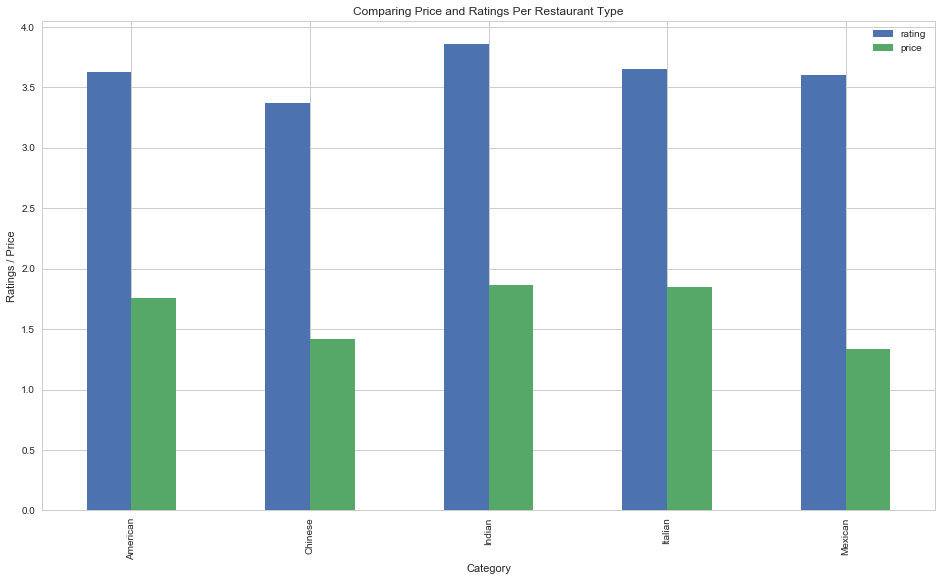

In [372]:
res_df.groupby("category").mean().plot(kind="bar",figsize=(16,9))
plt.xlabel("Category")
plt.ylabel("Ratings / Price")
plt.title("Comparing Price and Ratings Per Restaurant Type")
plt.savefig("Comparing_price_and_ratingcourt.png")
plt.show()

<h3>Part 1: Merging Data</h3>
    
Since a large part of our project revolved around correlationg geograpic location and Yelp restaurant data, we needed to merge all the necessary information into one larger dataframe. Thus, we merged res_df with our counties data on the county_string column. This allowed us to pull in and use all the data from both sources. 

Up until this point, if you noticed above, we had not inserted our regions, only created a placeholder column. In merging the two datasets, we were also able to populate our region column accordingly. 

We then printed res_df as a check to verify contents. 


In [373]:
res_df= pd.merge(res_df,counties,how="left",on="county_string")
res_df.head()

,name,zipcode,county_string,rating,review_count,category,price,region,CensusId,State,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Region
0,Cabo Fish Taco,28205,"Mecklenburg County, North Carolina",4.0,990,Mexican,2,region,37119,North Carolina,...,1.3,6.1,25.3,502455,86.0,9.1,4.8,0.1,8.9,SE
1,Midwood Smokehouse,28205,"Mecklenburg County, North Carolina",4.5,1281,American,2,region,37119,North Carolina,...,1.3,6.1,25.3,502455,86.0,9.1,4.8,0.1,8.9,SE
2,Sabor Latin Street Grill,28204,"Mecklenburg County, North Carolina",4.5,682,Mexican,1,region,37119,North Carolina,...,1.3,6.1,25.3,502455,86.0,9.1,4.8,0.1,8.9,SE
3,Benny Pennello's,28205,"Mecklenburg County, North Carolina",4.0,234,Italian,1,region,37119,North Carolina,...,1.3,6.1,25.3,502455,86.0,9.1,4.8,0.1,8.9,SE
4,JackBeagles,28205,"Mecklenburg County, North Carolina",4.0,292,American,1,region,37119,North Carolina,...,1.3,6.1,25.3,502455,86.0,9.1,4.8,0.1,8.9,SE


<h3>IDK - KYRUS can fill this part in. </h3>
<h3>Part 2: Examining category distribution across the US </h3>

In [374]:
itadf = res_df.groupby(res_df["category"]).get_group("Italian")
mexdf = res_df.groupby(res_df["category"]).get_group("Mexican")
chndf = res_df.groupby(res_df["category"]).get_group("Chinese")
usadf = res_df.groupby(res_df["category"]).get_group("American")
inddf = res_df.groupby(res_df["category"]).get_group("Indian")
res_df
# CHA = res_df.groupby(res_df["county_string"]).get_group("Mecklenburg County, North Carolina")
# CHAbreakdown = pd.DataFrame(CHA["category"].value_counts()).T.reset_index()
# CHAbreakdown["county_string"]="Mecklenburg County, North Carolina"
# CHA_price_avg = CHA.groupby(res_df["price"]).mean()
# CHA_price_count = CHA["price"].value_counts()

# RAL = res_df.groupby(res_df["county_string"]).get_group("Wake County, North Carolina")
# RALbreakdown = pd.DataFrame(RAL["category"].value_counts()).T.reset_index()
# RALbreakdown["county_string"]="Wake County, North Carolina"
# RAL_price_avg = RAL.groupby(res_df["price"]).mean()
# RAL_price_count = RAL["price"].value_counts()

# ATL = res_df.groupby(res_df["county_string"]).get_group("Fulton County, Georgia")
# ATLbreakdown = pd.DataFrame(ATL["category"].value_counts()).T.reset_index()
# ATLbreakdown["county_string"]="Fulton County, Georgia"
# ATL_price_avg = ATL.groupby(res_df["price"]).mean()
# ATL_price_count = ATL["price"].value_counts()

# MEM = res_df.groupby(res_df["county_string"]).get_group("Shelby County, Tennessee")
# MEMbreakdown = pd.DataFrame(MEM["category"].value_counts()).T.reset_index()
# MEMbreakdown["county_string"]="Shelby County, Tennessee"
# MEM_price_avg = MEM.groupby(res_df["price"]).mean()
# MEM_price_count = MEM["price"].value_counts()


# ORL = res_df.groupby(res_df["county_string"]).get_group("Orange County, Florida")
# ORLbreakdown = pd.DataFrame(ORL["category"].value_counts()).T.reset_index()
# ORLbreakdown["county_string"]="Orange County, Florida"
# ORL_price_avg = ORL.groupby(res_df["price"]).mean()
# ORL_price_count = ORL["price"].value_counts()

# MIL = res_df.groupby(res_df["county_string"]).get_group("Milwaukee County, Wisconsin")
# MILbreakdown = pd.DataFrame(MIL["category"].value_counts()).T.reset_index()
# MILbreakdown["county_string"]="Milwaukee County, Wisconsin"
# MIL_price_avg = MIL.groupby(res_df["price"]).mean()
# MIL_price_count = MIL["price"].value_counts()

# SFC = res_df.groupby(res_df["county_string"]).get_group("San Francisco County, California")
# SFCbreakdown = pd.DataFrame(SFC["category"].value_counts()).T.reset_index()
# SFCbreakdown["county_string"]="San Francisco County, California"
# SFC_price_avg = SFC.groupby(res_df["price"]).mean()
# SFC_price_count = SFC["price"].value_counts()

# AUS = res_df.groupby(res_df["county_string"]).get_group("Travis County, Texas")
# AUSbreakdown = pd.DataFrame(AUS["category"].value_counts()).T.reset_index()
# AUSbreakdown["county_string"]="Travis County, Texas"
# AUS_price_avg = AUS.groupby(res_df["price"]).mean()
# AUS_price_count = AUS["price"].value_counts()

# PIT = res_df.groupby(res_df["county_string"]).get_group("Allegheny County, Pennsylvania")
# PITbreakdown = pd.DataFrame(PIT["category"].value_counts()).T.reset_index()
# PITbreakdown["county_string"]="Allegheny County, Pennsylvania"
# PIT_price_avg = PIT.groupby(res_df["price"]).mean()
# PIT_price_count = PIT["price"].value_counts()


,name,zipcode,county_string,rating,review_count,category,price,region,CensusId,State,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Region
0,Cabo Fish Taco,28205,"Mecklenburg County, North Carolina",4.0,990,Mexican,2,region,37119,North Carolina,...,1.3,6.1,25.3,502455,86.0,9.1,4.8,0.1,8.9,SE
1,Midwood Smokehouse,28205,"Mecklenburg County, North Carolina",4.5,1281,American,2,region,37119,North Carolina,...,1.3,6.1,25.3,502455,86.0,9.1,4.8,0.1,8.9,SE
2,Sabor Latin Street Grill,28204,"Mecklenburg County, North Carolina",4.5,682,Mexican,1,region,37119,North Carolina,...,1.3,6.1,25.3,502455,86.0,9.1,4.8,0.1,8.9,SE
3,Benny Pennello's,28205,"Mecklenburg County, North Carolina",4.0,234,Italian,1,region,37119,North Carolina,...,1.3,6.1,25.3,502455,86.0,9.1,4.8,0.1,8.9,SE
4,JackBeagles,28205,"Mecklenburg County, North Carolina",4.0,292,American,1,region,37119,North Carolina,...,1.3,6.1,25.3,502455,86.0,9.1,4.8,0.1,8.9,SE
5,The Cellar At Duckworth's,28202,"Mecklenburg County, North Carolina",4.5,361,American,2,region,37119,North Carolina,...,1.3,6.1,25.3,502455,86.0,9.1,4.8,0.1,8.9,SE
6,Pinky's Westside Grill,28208,"Mecklenburg County, North Carolina",4.0,856,American,1,region,37119,North Carolina,...,1.3,6.1,25.3,502455,86.0,9.1,4.8,0.1,8.9,SE
7,The Fig Tree Restaurant,28204,"Mecklenburg County, North Carolina",4.5,343,American,3,region,37119,North Carolina,...,1.3,6.1,25.3,502455,86.0,9.1,4.8,0.1,8.9,SE
8,VBGB Beer Hall and Garden,28206,"Mecklenburg County, North Carolina",4.5,326,American,2,region,37119,North Carolina,...,1.3,6.1,25.3,502455,86.0,9.1,4.8,0.1,8.9,SE
9,Dandelion Market,28202,"Mecklenburg County, North Carolina",4.0,553,American,2,region,37119,North Carolina,...,1.3,6.1,25.3,502455,86.0,9.1,4.8,0.1,8.9,SE


<h3>IDK - KYRUS can fill this part in. </h3>
<h3>Part 2: Examining category distribution across the US </h3>

In [375]:
TOTAL_price_avg = res_df.groupby(["price"]).mean()
rescount = res_df.groupby(["county_string"]).count()["name"].reset_index()
rescount.columns=['county_string', 'restaurant_count']
TOTAL_county_reviews = res_df.groupby(["county_string"]).review_count.sum().reset_index()
TOTAL_county_reviews.columns=["county_string","review_count"]
TOTAL_county_avg = res_df.groupby(res_df["county_string"]).mean().reset_index()

county_stats = TOTAL_county_avg.merge(TOTAL_county_reviews, on="county_string")
csdf = county_stats.merge(counties, on="county_string")
c_df = rescount.merge(csdf, on="county_string")
c_df

,county_string,restaurant_count,rating,price,CensusId_x,TotalPop_x,Men_x,Women_x,Hispanic_x,White_x,...,OtherTransp_y,WorkAtHome_y,MeanCommute_y,Employed_y,PrivateWork_y,PublicWork_y,SelfEmployed_y,FamilyWork_y,Unemployment_y,Region
0,"Barry County, Missouri",4,3.750000,1.250000,29009.0,35726.0,17905.0,17821.0,8.5,87.2,...,1.0,4.2,22.5,14259,78.2,11.6,10.2,0.0,11.4,MW
1,"Bee County, Texas",10,3.200000,1.600000,48025.0,32659.0,19722.0,12937.0,57.3,33.1,...,1.5,1.9,23.0,10451,70.5,22.7,6.7,0.2,7.0,SW
2,"Boone County, Missouri",123,3.418699,1.601626,29019.0,170770.0,82533.0,88237.0,3.2,80.0,...,2.0,3.9,18.1,90949,71.4,24.0,4.4,0.1,5.0,MW
3,"Buncombe County, North Carolina",201,3.753731,1.691542,37021.0,247336.0,118950.0,128386.0,6.4,83.8,...,1.0,7.1,20.3,117252,79.0,12.4,8.4,0.3,7.0,SE
4,"Citrus County, Florida",51,3.647059,1.549020,12017.0,139654.0,67381.0,72273.0,5.1,88.9,...,2.5,5.6,24.9,43486,78.2,14.4,6.9,0.5,13.1,SE
5,"Clackamas County, Oregon",31,4.064516,1.645161,41005.0,389438.0,191639.0,197799.0,8.2,83.4,...,1.5,7.2,27.7,185660,80.9,11.1,7.8,0.2,8.3,WC
6,"Columbia County, New York",21,3.452381,1.666667,36021.0,62195.0,31244.0,30951.0,4.3,87.5,...,0.7,6.7,26.0,29962,71.0,19.8,8.9,0.3,6.7,NE
7,"Crawford County, Pennsylvania",19,3.684211,1.631579,42039.0,87343.0,42688.0,44655.0,1.2,95.2,...,1.4,4.5,21.7,37783,80.0,11.2,8.5,0.3,7.2,NE
8,"Crockett County, Tennessee",1,3.000000,2.000000,47033.0,14600.0,6906.0,7694.0,9.5,75.7,...,0.5,3.7,23.4,5766,77.7,14.3,7.9,0.1,7.4,SE
9,"East Feliciana County, Louisiana",3,3.833333,1.333333,22037.0,19855.0,10666.0,9189.0,1.3,52.8,...,0.6,2.7,33.0,7165,68.3,26.1,5.6,0.0,6.5,SE


In [376]:
current_county="Mecklenburg County, North Carolina"
WCO = res_df.groupby(res_df["county_string"]).get_group(current_county)
WCObreakdown = pd.DataFrame(WCO["category"].value_counts()).T.reset_index()
WCOrate = pd.DataFrame(WCO["rating"].value_counts()).T.reset_index()
WCObreakdown["county_string"]=current_county
WCO_price_avg = WCO.groupby(res_df["price"]).mean()
WCO_price_count = WCO["price"].value_counts()
WCObreakdown


,index,American,Mexican,Italian,Chinese,Indian,county_string
0,category,176,70,42,33,13,"Mecklenburg County, North Carolina"


In [377]:
comp_df = pd.DataFrame(columns=["Italian","Mexican","Chinese","American", "Indian","county_string"])
comp_df = comp_df.append(WCObreakdown)
comp_df = comp_df.append(WCObreakdown)
comp_df = comp_df.append(WCObreakdown)
comp_df = comp_df.append(WCObreakdown)
comp_df = comp_df.append(WCObreakdown)
comp_df = comp_df.append(WCObreakdown)
comp_df = comp_df.append(WCObreakdown)
comp_df = comp_df.append(WCObreakdown)
comp_df = comp_df.append(WCObreakdown)
comp_df = comp_df.reset_index()
del comp_df["index"]
del comp_df["level_0"]
#comp_df["Totals"]=comp_df["Italian"]+comp_df["Mexican"]+comp_df["Chinese"]+comp_df["Indian"]+comp_df["American"]
comp_df

,American,Chinese,Indian,Italian,Mexican,county_string
0,176,33,13,42,70,"Mecklenburg County, North Carolina"
1,176,33,13,42,70,"Mecklenburg County, North Carolina"
2,176,33,13,42,70,"Mecklenburg County, North Carolina"
3,176,33,13,42,70,"Mecklenburg County, North Carolina"
4,176,33,13,42,70,"Mecklenburg County, North Carolina"
5,176,33,13,42,70,"Mecklenburg County, North Carolina"
6,176,33,13,42,70,"Mecklenburg County, North Carolina"
7,176,33,13,42,70,"Mecklenburg County, North Carolina"
8,176,33,13,42,70,"Mecklenburg County, North Carolina"


<h3>Part 2: Examining category distribution across the US </h3>

Next, Kyrus generated a for loop to create multiple pie charts representing the categorical breakdown by count

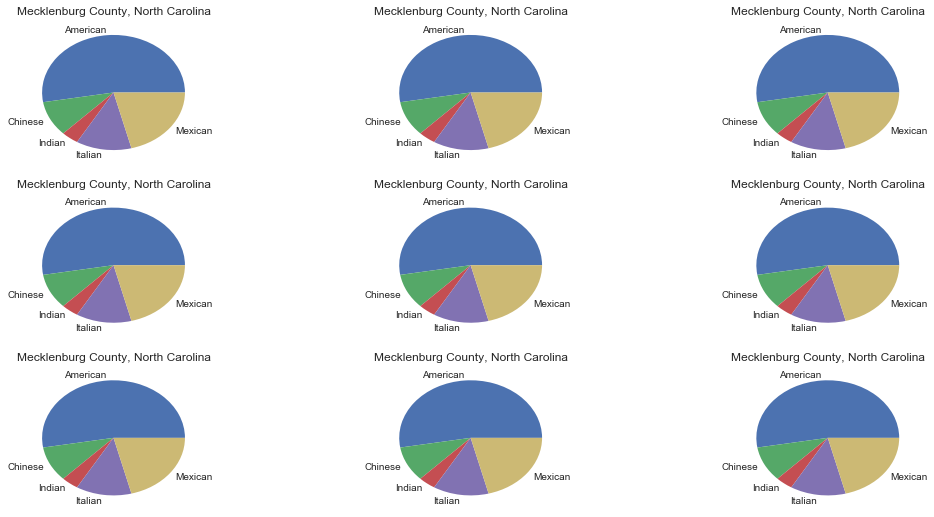

In [378]:
fig, axes = plt.subplots(3,3,figsize= (16,9))
for i, (idx, row) in enumerate(comp_df.set_index("county_string").iterrows()):
    ax = axes[i // 3, i % 3]
    row = row[row.gt(row.sum()*.01)]
    ax.pie(row, labels=row.index)
    ax.set_title(idx)
fig.subplots_adjust(wspace=1)

In [379]:
plt.show()

<h3>Part 3: Examining price breakdown based on region and restaurant category</h3>

<b>The RQ:</b> How does price rating (\$, \$\$, \$\$\$, \$\$\$\$) breakdown for our randomly pulled cities? What is a the price rating breakdown by specific region and restaurant category? We expect higher income regions to have higher priced restaurants - ex: we would expect New York County  to have more 4\$ restaurants than a given county in the Midwest. We will see if the data of our randomly selected cities shows an even or uneven distribution based on price breakdown by category and by region. 

---------------------------------

After examining the categorical breakdown based on county, we moved on to determine the price breakdown by both region and restaurant category. 

This was Randi's portion of the project. We ran into some tricky stuff with the stacked bar charts. The primary issue was that the each bar's list needed to be the same length, that was fine, except when there was a restaurant for every price braket. Also, in all of her research Randi could not find how to make the stacked bars dynamic. In all the examples she found, the bar values were created manually. This is fine if you have a small dataset that you do not intend to run over and over again; however, this was not ideal for this project. 

<b>With some help from Mirko, Ryan, and Caleb, we figured it out! </b>

First, we needed to define this list we would be looping through. For the first chart, Number of \$ per Category, we created a list named labels that contained all the different restaurant categories. Then, we created a second list with four empty lists. These four empty lists would represet 1\$, 2\$, 3\$, and 4\$. We then looped through our category list and found the count for each of the dollar ratings in said category. Once the loop determined how many 1\$, 2\$, 3\$, and 4\$ there were in each category it appended it to the corresponding empty list. If we did not find a 1\$, 2\$, 3\$, and 4\$ for a particular restaurant category, then the except argument kicked-in and instead appended a zero. Again, the goal was to make each of the four lists the same length. 

In the end, we ended up with a list corresponding to 1\$, 2\$, 3\$, and 4\$, with ratings per restaurant category. 

Once we created this loop and stored the counts in lists, we could call these lists in our chart creation; thereby, making the charts dynamic, changing with the number of pulls.

In [380]:
# Established the restaurant categories we will loop through
labels = ["Italian","Mexican","Chinese","American", "Indian"]

# Create and list of empty lists that will hold the count for $, $$, $$$, $$$$ per restaurant category
bars =[[],[],[],[]]

# Will first loop through the restaurant categories
for label in labels:
    df= res_df.loc[res_df["category"]==label, :]
    counts = df["price"].value_counts()
    
    # Now will loop through the price ranges and if there is a price, it will append it to the matching empty list
    # If there is no restaurant in that price range, then the we will use the except and append a zero
    for price in range(1,5):
        try:
            bars[price-1].append(counts[price])
        except: 
            bars[price-1].append(0)

# Check
print(bars[1])

[229, 146, 102, 681, 39]


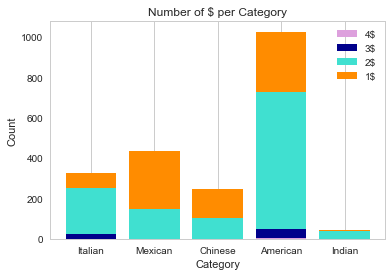

In [381]:
from matplotlib import rc

# Establish our seaborn settings 
sns.set()
# orgPalette = sns.color_palette("Set2", len(res_by_price))
# sns.set_palette(orgPalette)
sns.set_style("whitegrid", {'legend.frameon':False})

# set fig size
figsize= (100, 100, 50)
 
# Values for each stacked bar based on our above for loop 
# This make the bar values dynamic so we do not have to manually set the values 
bars1 = bars[0]
bars2 = bars[1]
bars3 = bars[2]
bars4 = bars[3]
x = np.arange(len(bars1))

# Plot our four bars from above values
four_dolla=plt.bar(x, bars4, color="plum")
three_dolla=plt.bar(x, bars3, color="darkblue", bottom=bars4)
two_dolla=plt.bar(x, bars2, color="turquoise", bottom=list(map(lambda x,y: x+y, bars3,bars4)))
one_dolla=plt.bar(x, bars1, color="darkorange", bottom=list(map(lambda x,y,z: x+y+z, bars3,bars4,bars2)))

# Set our xticks based on categories
plt.xticks(x, ["Italian","Mexican","Chinese","American", "Indian"])

# Set our grid
plt.grid(axis='y')

# Set graph labels 
plt.xlabel("Category")
plt.ylabel('Count')
plt.title('Number of $ per Category')
    
# Set our legend
plt.legend((four_dolla[0], three_dolla[0],two_dolla[0], one_dolla[0]), ('4$', '3$','2$', '1$'), loc="best")


# Show graphic
plt.show()

# Save image
plt.savefig("stacked.png")

In [382]:
# Established the regions we will loop through
region = ["NE","MW","WC","SW","SE"]

# Create and list of empty lists that will hold the count for $, $$, $$$, $$$$ per region
r_bars =[[],[],[],[]]

# Will first loop through the regions
for r in region:
    reg_bars= res_df.loc[res_df["Region"]==r, :]
    reg_counts = reg_bars["price"].value_counts()
    
    # Now will loop through the price ranges and if there is a price, it will append it to the matching empty list
    # If there is no restaurant in that price range, then the we will use the except and append a zero
    for price in range(1,5):
        try:
            r_bars[price-1].append(reg_counts[price])
        except: 
            r_bars[price-1].append(0)

# Check            
print(r_bars)


[[195, 184, 140, 43, 251], [367, 213, 250, 34, 333], [17, 10, 14, 0, 24], [0, 0, 0, 0, 6]]


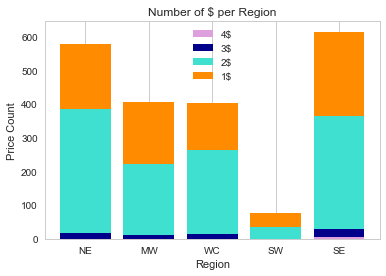

In [383]:
# Establish our seaborn settings 
sns.set()
# orgPalette = sns.color_palette("Set2", len(res_by_price))
# sns.set_palette(orgPalette)
sns.set_style("whitegrid", {'legend.frameon':False})

# set fig size
figsize= (100, 100, 50)

# Values for each stacked bar based on our above for loop 
# This make the bar values dynamic so we do not have to manually set the values 
bars1 = r_bars[0]
bars2 = r_bars[1]
bars3 = r_bars[2]
bars4 = r_bars[3]
x = np.arange(len(bars1))

# Plot our four bars from above values
four_dol = plt.bar(x, bars4, color="plum")
three_dol =plt.bar(x, bars3, color="darkblue", bottom=bars4)
two_dol =plt.bar(x, bars2, color="turquoise", bottom=list(map(lambda x,y: x+y, bars3,bars4)))
one_dol =plt.bar(x, bars1, color="darkorange", bottom=list(map(lambda x,y,z: x+y+z, bars3,bars4,bars2)))

# Set our xticks based on categories
plt.xticks(x, ["NE","MW","WC","SW","SE"])

# Set our grid
plt.grid(axis='y')

# Set graph labels 
plt.xlabel("Region")
plt.ylabel('Price Count')
plt.title('Number of $ per Region')

# Set graph legend 
plt.legend((four_dol[0], three_dol[0],two_dol[0], one_dol[0]), ('4$', '3$','2$', '1$'), loc="best")

# Show graphic
plt.show()

# Save image
plt.savefig("stacked2.png")

<h3>Part 3: Pie Chart</h3>
    
With the dynamic stacked bar charts created, we thought it was relevant to also see the count of each dollar amount when comparing the counts by region or category. Thus, we created a pie chart (also dynamic) that shows the total of each restaurant category by dollar. 

In [ ]:
# Check our sums for pie chart
print(sum(bars1))
print(sum(bars2))
print(sum(bars3))
print(sum(bars4))

In [ ]:
# Establish the auto percents
# Create definitions 
def make_autopct(sizes):
    def my_autopct(pct):
        total = sum(sizes)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct


In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

# Establish our seaborn settings 
sns.set()
orgPalette = sns.color_palette("Set2")
sns.set_palette(orgPalette)
# sns.set_style("", {'legend.frameon':False})

# set fig size
plt.figure(figsize=(20,20))

# Set our labels, sizes, and explode values 
# We won't use labels because we will create a legend instead, but we could easily assign the labels

#labels = '4$', '3$','2$', '1$'
sizes = [sum(bars1),sum(bars2),sum(bars3),sum(bars4)]
explode = (0.03, 0.03, 0.03, 0.5)  # only "explode" the 2nd slice 


# Plot our pie chart with total sums by $ breakdown and place the percetages 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, colors=orgPalette, autopct=make_autopct(sizes),
        shadow=True, startangle=90) 

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')  

# Set graph title 
plt.title('Sum of each $ Amount')

# Set graph legend 
plt.legend((four_dol[0], three_dol[0],two_dol[0], one_dol[0]), ('4$', '3$','2$', '1$'), loc="best")


# Show graphic
plt.show()

# Save image
plt.savefig("pie_chart.jpg")

<h3>Part 4: MONICA</h3>


<h3>Part 5: CATHERINE</h3>


<h3>Part 6: Conclusions</h3>


<h3>Part 7: Limitations</h3>

Initially, we wanted to find out if there wass there a relationship between income and type of dining (ie dine-in, carry-out, delivery)? Is this based on the number of restaurants that provide these options?


Unfortunately, this didn’t work due to Yelp API limitations. Acoording to their website, currently, the transaction endpoint is "only supports food delivery in the US."

Since the current Yelp Fusion API only supports the delivery option it isn’t very helpful for comparison or analysis purposes. 


<h3>Part 8: If only we had more time...</h3>

<ul>
<li>Attempt to match user category input with local restaurant </li>
<li>"Build a lunch recommendation Slack bot that can pull highest rated Yelp places around your location. You can build the script to respond to user input (ex. “Chinese, $”) or generate top-rated places randomly." This was just too ambitious for our timeframe </li>
</ul>
